# <font color='red'>*The first 6 cells must be executed*</font> 

In [1]:
import os
import time
from stat import S_ISREG, ST_CTIME, ST_MODE
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import operator
from collections import Counter
from prettytable import PrettyTable

In [2]:

def retrieve_all_islands_files_recursively_sorted_by_date(dirName):
    """retrieve all files in the supplied directory and its sub directories.
        :param dirName the path of the directory"""

    listOfFiles = list()
    for (dirpath, dirnames, filenames) in os.walk(dirName):
        listOfFiles += [os.path.join(dirpath, file) for file in filenames]
    # for elem in listOfFiles:
    #    print(elem)
    listOfFiles = ((os.stat(path), path) for path in listOfFiles)
    listOfFiles = ((stat[ST_CTIME], path) for stat, path in listOfFiles)

    listOfFiles = sorted(listOfFiles)
    listOfFiles = [listOfFiles[i][1] for i in range(len(listOfFiles))]
    return listOfFiles

def extract_imigrants_list(valid_list, deviceName):
    result = []
    for entry in valid_list:
        k = entry[~entry['parent'].str.contains(deviceName)]
        k = k.drop(k[k.parent == "-1"].index)
        result.append(k)
    return result

def find_max_winner(immig_dataframe_list):
    results = {}
    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        immigirants_counts_dictionary = dict(Counter(immig['parent']))
        # print(immigirants_counts_dictionary)
        
        temp_dic = max(immigirants_counts_dictionary.items(), key=operator.itemgetter(1))
        results.update({temp_dic[0]: temp_dic[1] - 1}) # -1 since the last entry will be a loss not a winning
    return results


def extract_winners(valid_list):
    result = []
    for entry in valid_list:
        result.append(entry.loc[entry['wasFitter'] == True])
    return result

def extract_winners_joules(valid_list):
    result = []
    for entry in valid_list:
        result.append(np.asarray(entry.loc[entry['wasFitter'] == True]['joules']))
    return result

def remove_duplicates(dataframes_list, column_names=['parent']):
    result = []
    for entry in dataframes_list:
        # df[~df['str_name'].str.contains('c')]
        entry = entry.drop_duplicates(subset=column_names, keep='first')
        result.append(entry)
    return result


def get_max_in_dictionary(target_dictionary):
    #for item_ in target_dictionary_list:
    return max(target_dictionary.items(), key=operator.itemgetter(1))  # find max, -1 to subtract the last entry in which the immigrant was not a winner

def save_to_excel(data, filename, dir_):
    if type(data) is not pd.DataFrame:
        data = pd.DataFrame(data)
    with pd.ExcelWriter(dir + "/" + filename + '.xlsx') as writer:
        data.to_excel(writer, sheet_name="data")

In [3]:
islands_datasets_dir = "datasets/islands_experiments"
isolated_datasets_dir = "datasets/isolated_experiments"

plots_dir = "plots/"
is_save_plots = False

In [4]:
# Loading the islands datasets 
N9A6 = []
N6A6 = []
N6A7 = []
MGA6 = []
MGA7 = []

all_logs = retrieve_all_islands_files_recursively_sorted_by_date(islands_datasets_dir)
for log_ in all_logs:
    if 'N9A6' in log_:
        N9A6.append(pd.read_excel(log_))
    elif 'N6A6' in log_:
        N6A6.append(pd.read_excel(log_))
    elif 'N6A7' in log_:
        N6A7.append(pd.read_excel(log_))
    elif 'MGA6' in log_:
        MGA6.append(pd.read_excel(log_))
    elif 'MGA7' in log_:
        MGA7.append(pd.read_excel(log_))
    else: print("unknown!!!")


In [5]:
# Loading the islands datasets 

N9A6_isolated = []
N6A6_isolated = []
N6A7_isolated = []
MGA6_isolated = []
MGA7_isolated = []

all_logs = retrieve_all_islands_files_recursively_sorted_by_date(isolated_datasets_dir)
for log_ in all_logs:
    if 'N9A6' in log_:
        N9A6_isolated.append(pd.read_excel(log_))
    elif 'N6A6' in log_:
        N6A6_isolated.append(pd.read_excel(log_))
    elif 'N6A7' in log_:
        N6A7_isolated.append(pd.read_excel(log_))
    elif 'MGA6' in log_:
        MGA6_isolated.append(pd.read_excel(log_))
    elif 'MGA7' in log_:
        MGA7_isolated.append(pd.read_excel(log_))
    else: print("unknown!!!")


# Islands vs Isolated Runs
### The following 2 cells are used to visually compare how the evoluation progressed on island and isotlate runs. 
### The plot is 10*10 i.e. it contains 100 subplots, you might need to zoom-in to see the labels title. 
### Island runs are in Blue.

In [6]:

### extract the winners for each devices per experiment set

N9A6_island_winners = extract_winners_joules(N9A6)
N9A6_isolated_winners = extract_winners_joules(N9A6_isolated)

N6A6_island_winners = extract_winners_joules(N6A6)
N6A6_isolated_winners = extract_winners_joules(N6A6_isolated)

N6A7_island_winners = extract_winners_joules(N6A7)
N6A7_isolated_winners = extract_winners_joules(N6A7_isolated)

MGA6_island_winners = extract_winners_joules(MGA6)
MGA6_isolated_winners = extract_winners_joules(MGA6_isolated)

MGA7_island_winners = extract_winners_joules(MGA7)
MGA7_isolated_winners = extract_winners_joules(MGA7_isolated)


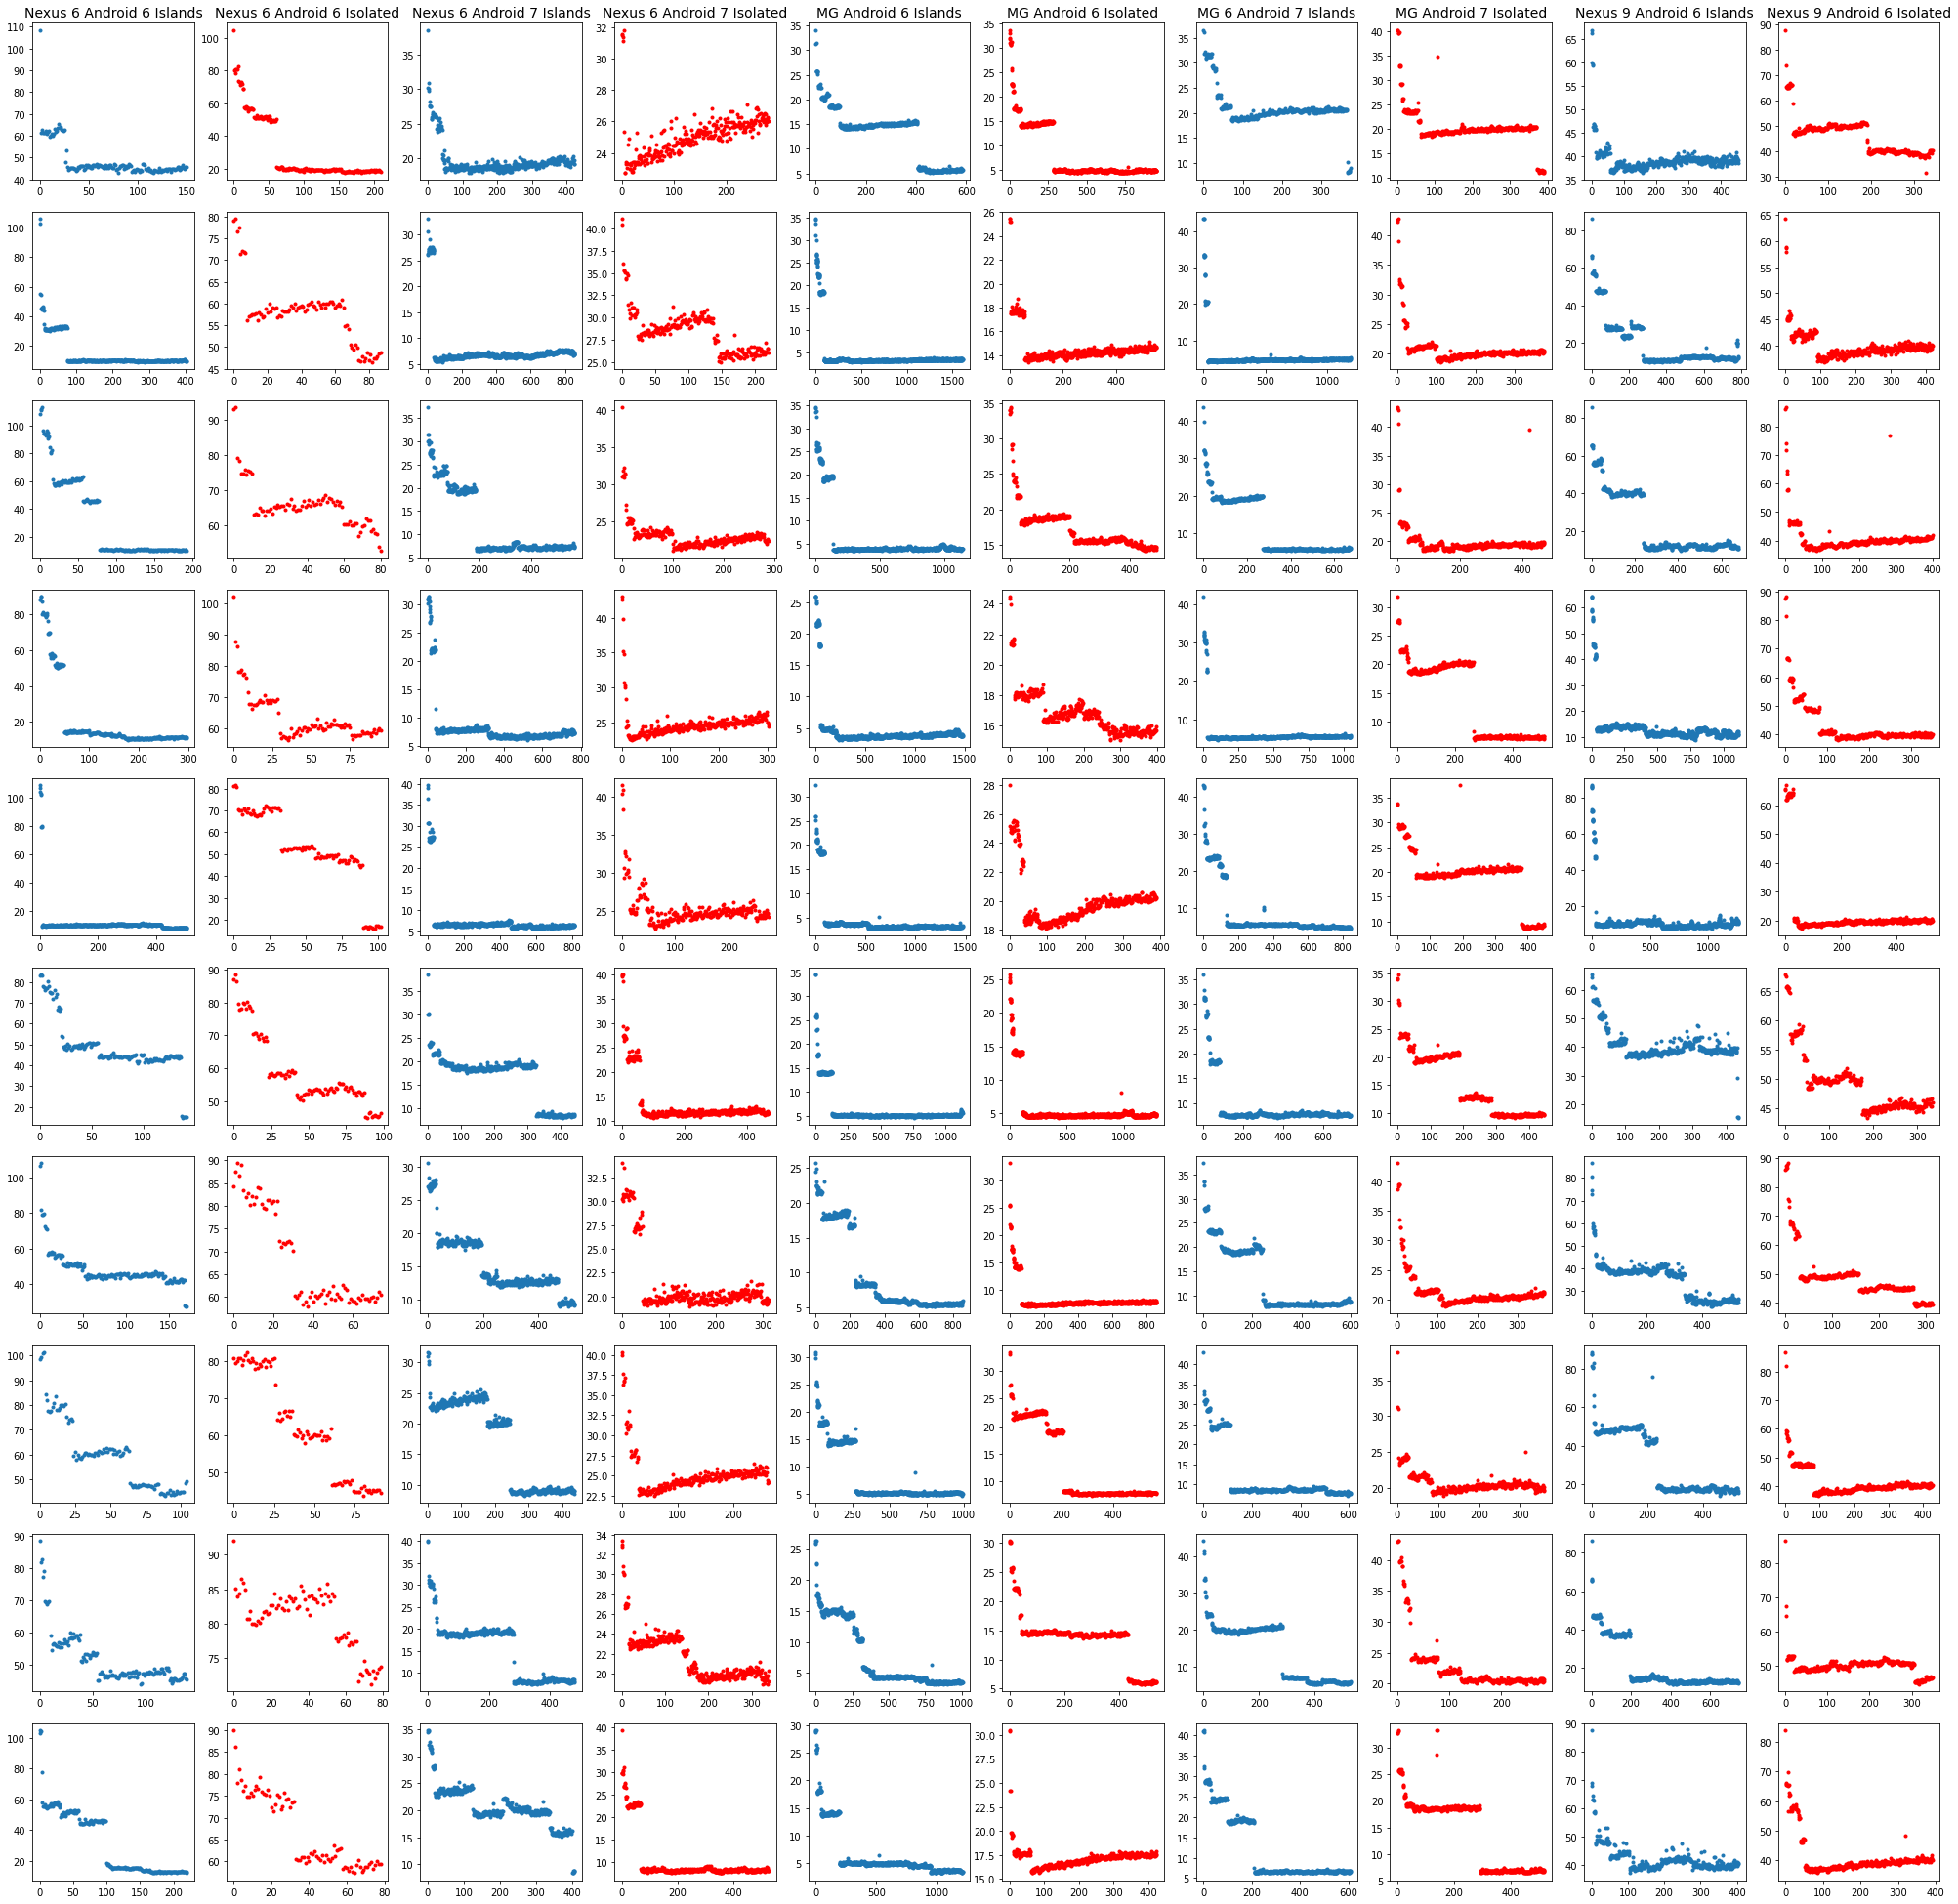

In [31]:
### The cell above must be executed where devices' isolated/islands winner energy use data is exctracted
title_font_size=14
fig, axs = plt.subplots(10, 10, figsize=(35, 35))
axs[0,0].set_title('Nexus 6 Android 6 Islands', fontsize=title_font_size)
axs[0,1].set_title('Nexus 6 Android 6 Isolated', fontsize=title_font_size)

axs[0,2].set_title('Nexus 6 Android 7 Islands', fontsize=title_font_size)
axs[0,3].set_title('Nexus 6 Android 7 Isolated', fontsize=title_font_size)

axs[0,4].set_title('MG Android 6 Islands', fontsize=title_font_size)
axs[0,5].set_title('MG Android 6 Isolated', fontsize=title_font_size)

axs[0,6].set_title('MG 6 Android 7 Islands', fontsize=title_font_size)
axs[0,7].set_title('MG Android 7 Isolated', fontsize=title_font_size)

axs[0,8].set_title('Nexus 9 Android 6 Islands', fontsize=title_font_size)
axs[0,9].set_title('Nexus 9 Android 6 Isolated', fontsize=title_font_size)
for i in range(10):
    

    axs[i,0].plot(N6A6_island_winners[i], '.')
    axs[i,1].plot(N6A6_isolated_winners[i],'.', c='r')
    
    axs[i,2].plot(N6A7_island_winners[i], '.')
    axs[i,3].plot(N6A7_isolated_winners[i],'.', c='r')
    
    axs[i,4].plot(MGA6_island_winners[i], '.')
    axs[i,5].plot(MGA6_isolated_winners[i],'.', c='r')
    
    axs[i,6].plot(MGA7_island_winners[i], '.')
    axs[i,7].plot(MGA7_isolated_winners[i],'.', c='r')
    
    axs[i,8].plot(N9A6_island_winners[i], '.')    
    axs[i,9].plot(N9A6_isolated_winners[i],'.', c='r')

#plt.savefig(plots_dir + 'island-vs-isolated-all-devices',facecolor='w', dpi=100)
plt.show()

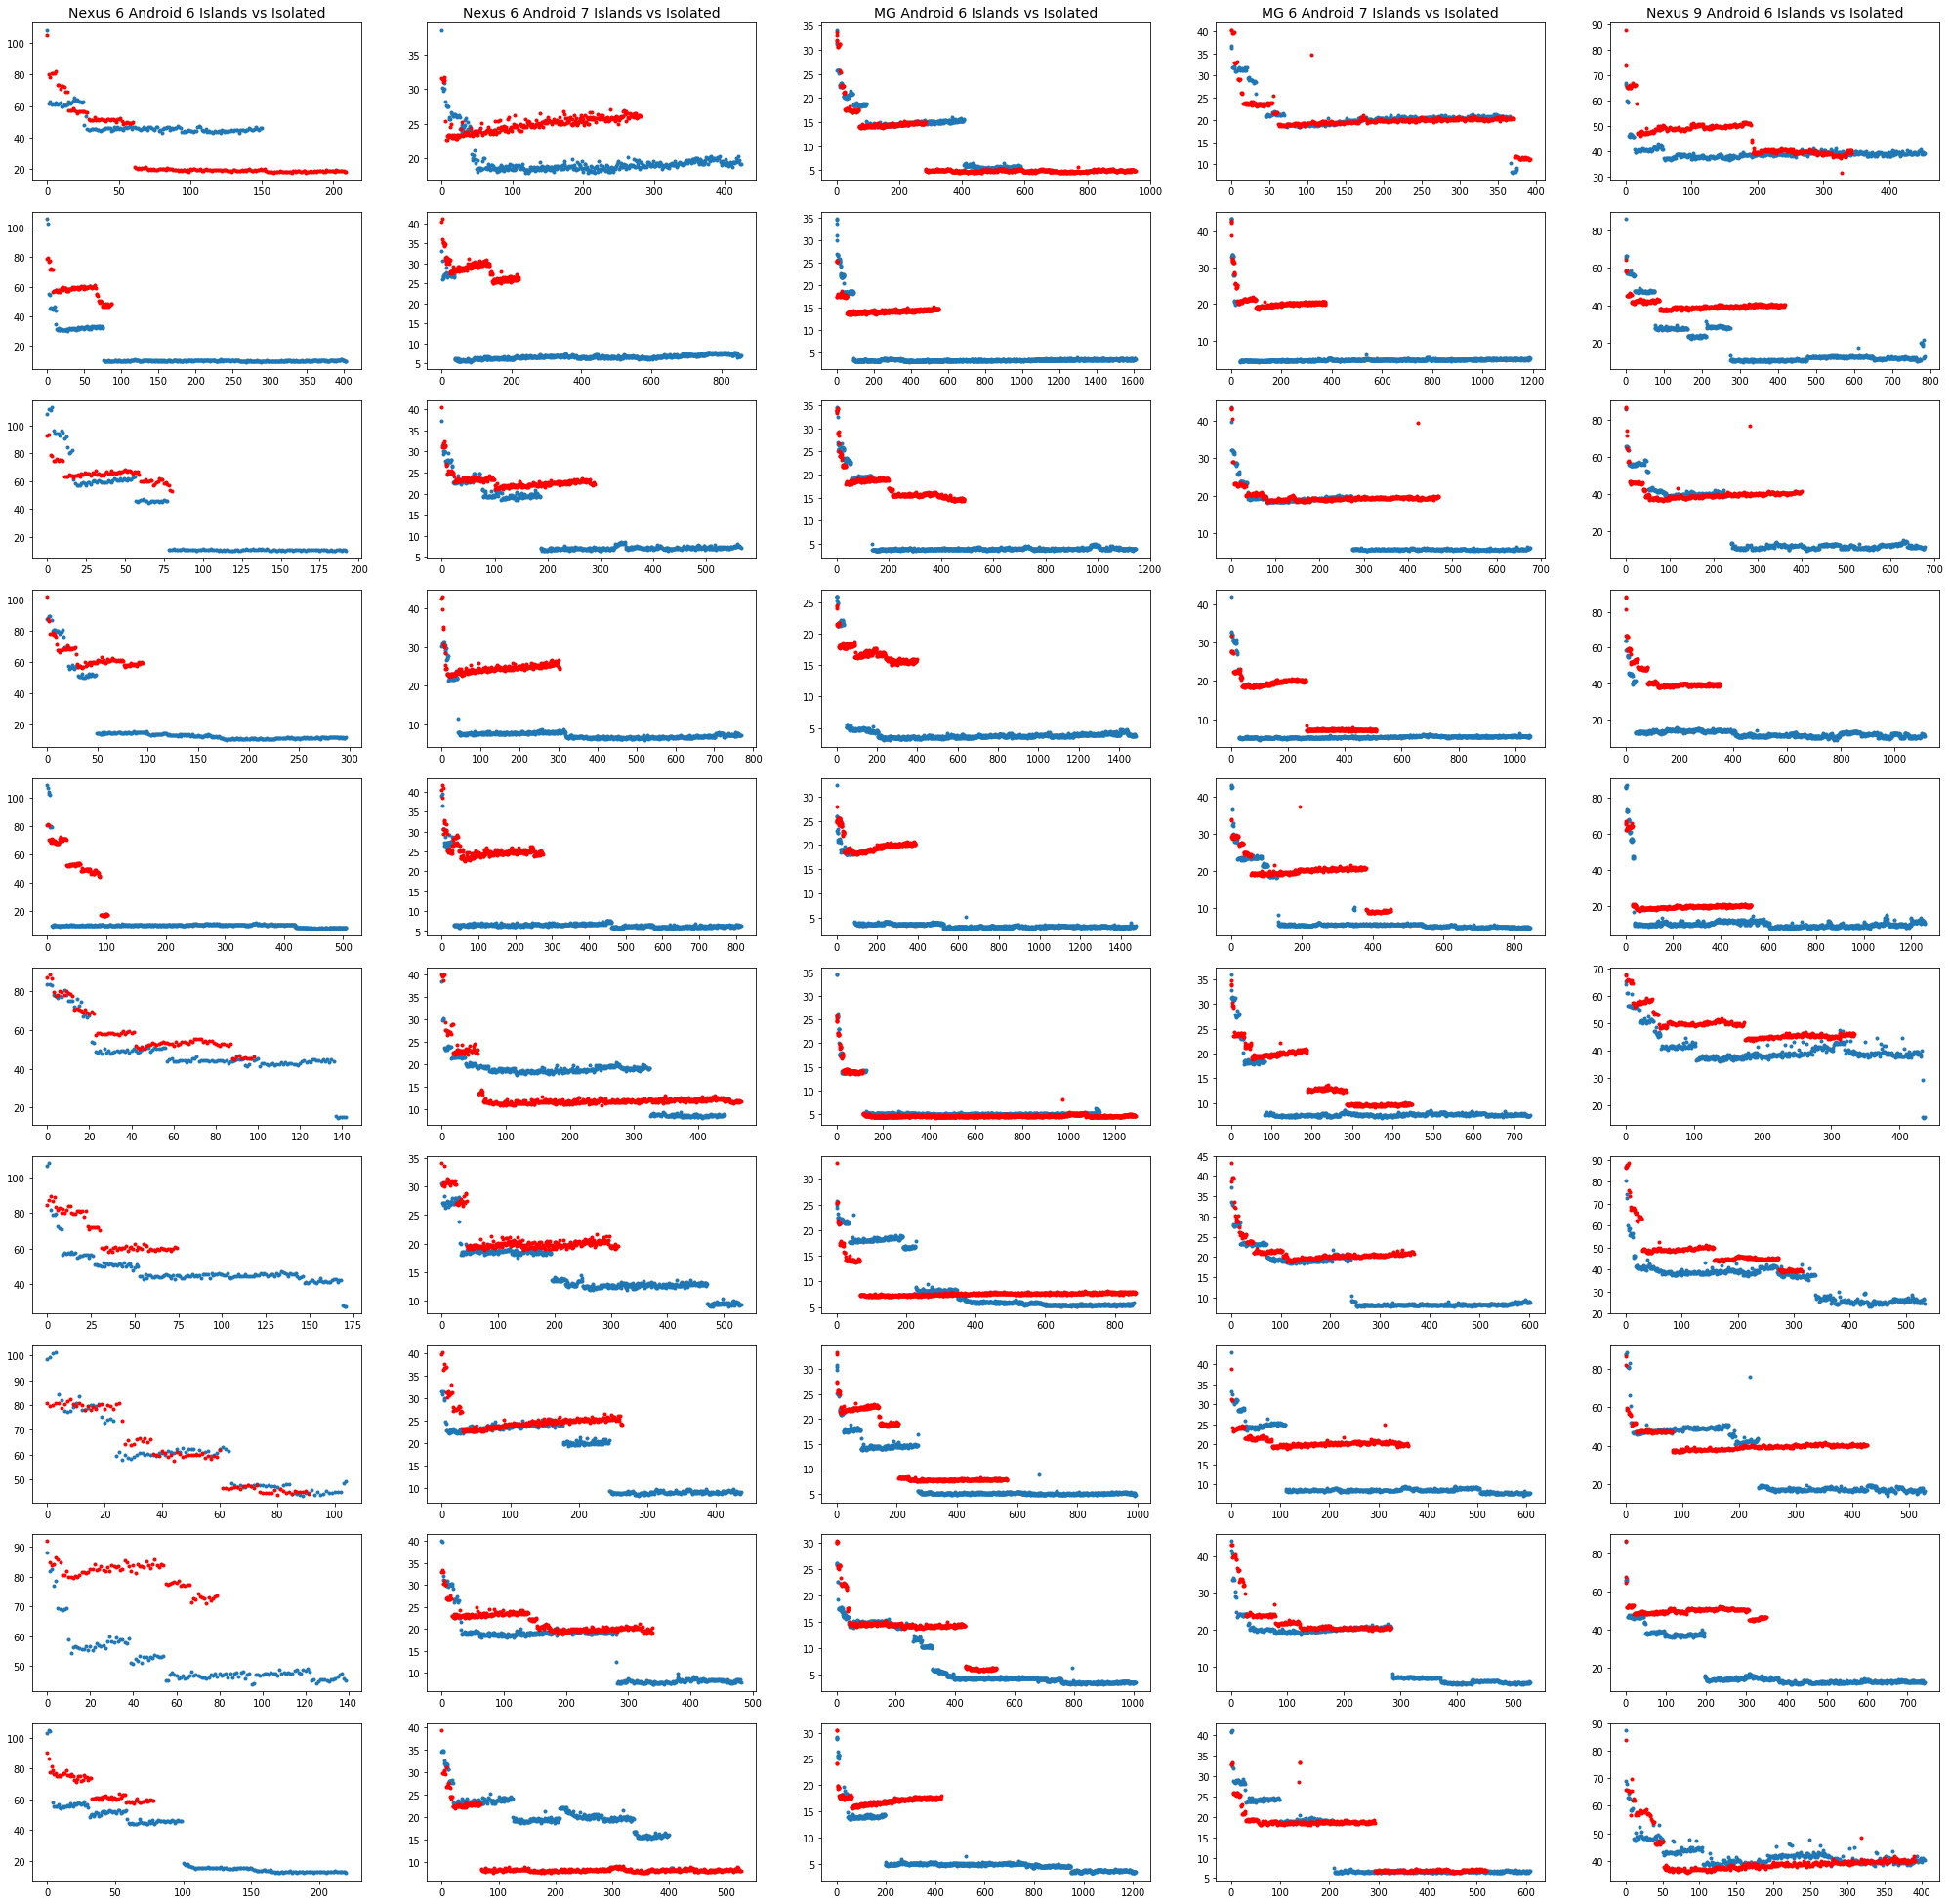

In [147]:
### The cell above must be executed where devices' isolated/islands winner energy use data is exctracted
title_font_size=14
fig, axs = plt.subplots(10, 5, figsize=(35, 35))
axs[0,0].set_title('Nexus 6 Android 6 Islands vs Isolated', fontsize=title_font_size)
#axs[0,1].set_title('Nexus 6 Android 6 Isolated', fontsize=title_font_size)

axs[0,1].set_title('Nexus 6 Android 7 Islands vs Isolated', fontsize=title_font_size)
#axs[0,3].set_title('Nexus 6 Android 7 Isolated', fontsize=title_font_size)

axs[0,2].set_title('MG Android 6 Islands vs Isolated', fontsize=title_font_size)
#axs[0,5].set_title('MG Android 6 Isolated', fontsize=title_font_size)

axs[0,3].set_title('MG 6 Android 7 Islands vs Isolated', fontsize=title_font_size)
#axs[0,7].set_title('MG Android 7 Isolated', fontsize=title_font_size)

axs[0,4].set_title('Nexus 9 Android 6 Islands vs Isolated', fontsize=title_font_size)
#axs[0,9].set_title('Nexus 9 Android 6 Isolated', fontsize=title_font_size)
for i in range(10):
    

    axs[i,0].plot(N6A6_island_winners[i], '.')
    axs[i,0].plot(N6A6_isolated_winners[i],'.', c='r')
    
    axs[i,1].plot(N6A7_island_winners[i], '.')
    axs[i,1].plot(N6A7_isolated_winners[i],'.', c='r')
    
    axs[i,2].plot(MGA6_island_winners[i], '.')
    axs[i,2].plot(MGA6_isolated_winners[i],'.', c='r')
    
    axs[i,3].plot(MGA7_island_winners[i], '.')
    axs[i,3].plot(MGA7_isolated_winners[i],'.', c='r')
    
    axs[i,4].plot(N9A6_island_winners[i], '.')    
    axs[i,4].plot(N9A6_isolated_winners[i],'.', c='r')

#plt.savefig(plots_dir + 'island-vs-isolated-all-devices',facecolor='w', dpi=100)
plt.show()

In [9]:
## Confidence Interval on fixed data sizes
### now calculate the average of fitness for each device
def get_confidence_interval(device_joules_array, conf_level=95):
    #1. find the smallest dataset size  *this is uggly :(*
    min_size = 1000000000
    for i in range(len(device_joules_array)):
        min_size = min(min_size, len(device_joules_array[i]))
        print(min_size, 'is smaller than', len(device_joules_array[i])) # I just want to see how much points are wasted 
    #2. extract only 0 to min_size data point
    data_points = np.zeros([min_size, len(device_joules_array)]) # its size must equal min_Size
    
    for evaluation_number in range(min_size):
        sum_evaluation_horiz = 0
        for exp_number in range(len(device_joules_array)):
            data_points[evaluation_number, exp_number] = device_joules_array[exp_number][evaluation_number]
        #sum_list[evaluation_number] = sum_evaluation_horiz
        
    #2. confidence interval
    confs_z= {95:1.96, 99:2.576, 99.5:2.807, 99.9:3.291} # normally distributed/large sets
    confs_t= {95:1.812, 99:2.764, 99.5:3.169, 99.9:4.144} # small sets and unknown population std, these numbers are for datasets with size 10. https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
    # In case there's a confusion on the difference between z and t scores, or on the way CI is calculated: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html
    
    average_evaluation = np.mean(data_points, axis=1)
    std_evaluations = np.std(data_points, axis=1) # std for each row
    conf_interval = confs_t[conf_level] * std_evaluations/np.sqrt(len(device_joules_array)) # have to divide it by 10 (number of experiments) 
                                                                                            #since the CI is for the 10 points collected from each experiment at every evaluation number.
    return average_evaluation, std_evaluations, conf_interval

def plot_confidence_interval(device_island_joules, device_isolated_joules, title, conf_level = 95):
    print("processing island datasets")
    device_island_joules_mean, device_island_joules_std, device_island_joules_ci =  get_confidence_interval(device_island_joules)
    print('sizes of average, std and CI lists: ', len(device_island_joules_mean), len(device_island_joules_std), len(device_island_joules_ci))
    print("processing isolated datasets")
    device_isolated_joules_mean, device_isolated_joules_std, device_isolated_joules_ci = get_confidence_interval(device_isolated_joules) 
    print('sizes of average, std and CI lists: ', len(device_isolated_joules_mean), len(device_isolated_joules_std), len(device_isolated_joules_ci))
    
    plt.plot(device_island_joules_mean, '.')
    plt.fill_between(range(len(device_island_joules_mean)), device_island_joules_mean-device_island_joules_ci, device_island_joules_mean+device_island_joules_ci, 
                     color='grey', alpha=.5) 
    
    plt.plot(device_isolated_joules_mean, '.', color='red')
    plt.fill_between(range(len(device_isolated_joules_mean)), device_isolated_joules_mean-device_isolated_joules_ci, device_isolated_joules_mean+device_isolated_joules_ci, 
                     color='grey', alpha=.5) 
    plt.title(title+" Island vs Isolated runs")
    plt.legend(['islands', 'isolated'])
    
    plt.show()
    return device_island_joules_mean, device_island_joules_std, device_island_joules_ci

In [8]:
## Confidence interval unfixed data size, I refused to do this since it is not correct, however,  Markus and Brad insisted on it.
def get_min_max_sizes(dataset):
    min_size = 1000000000
    max_size = 0
    for i in range(len(dataset)):
        min_size = min(min_size, len(dataset[i]))
        max_size = max(max_size, len(dataset[i]))
    return min_size, max_size

### now calculate the average of fitness for each device
def get_confidence_interval_2(device_joules_array, conf_level=95):
    #1. find the min and max dataset size, max will be used to initialise the needed arrays.

    min_size, max_size = get_min_max_sizes(device_joules_array)
    #data_points = np.zeros([max_size, len(device_joules_array)])
    data_points_all = [] # this will contain lists. Each list represnts the dataset of an experiment

    for evaluation_number in range(max_size):
        data_point_exp = [] 
        for exp_number in range(len(device_joules_array)):
            if(len(device_joules_array[exp_number]) > evaluation_number):
                data_point_exp.append( device_joules_array[exp_number][evaluation_number])
        data_points_all.append(data_point_exp)

        
    
    #2 average and std
    average_evaluation = np.zeros(len(data_points_all))
    std_evaluations = np.zeros(len(data_points_all))
    for i in range(len(data_points_all)):
        #average_evaluation.append(sum(data_points_all[i])/len(data_points_all[i]))
        average_evaluation[i] = (np.mean(data_points_all[i]))
        std_evaluations[i] = (np.std(data_points_all[i]))
    
    #3. confidence interval
    confs_z= {95:1.96, 99:2.576, 99.5:2.807, 99.9:3.291} # normally distributed/large sets
    confs_t= {1:12.71,2:4.303,3:3.182,4:2.776,5:2.571,6:2.447,7:2.365,8:2.306, 9:2.262, 10:2.228} # small sets and unknown population std, these numbers are for datasets with size 10. https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
    
    conf_interval = np.empty_like(average_evaluation,float)
    for i in range(len(std_evaluations)):
        conf_interval[i] = confs_t[len(data_points_all[i])] * std_evaluations[i]/np.sqrt(len(data_points_all[i])) # have to divide it by 10 (number of experiments) 
                                                                                            #since the CI is for the 10 points collected from each experiment at every evaluation number.
    return average_evaluation, std_evaluations, conf_interval
    #return average_evaluation, std_evaluations, data_points_all

def plot_confidence_interval2(device_island_joules, device_isolated_joules, title, conf_level = 95):
    print("processing island datasets")
    device_island_joules_mean, device_island_joules_std, device_island_joules_ci =  get_confidence_interval_2(device_island_joules)
    print('sizes of average, std and CI lists: ', len(device_island_joules_mean), len(device_island_joules_std), len(device_island_joules_ci))
    print("processing isolated datasets")
    device_isolated_joules_mean, device_isolated_joules_std, device_isolated_joules_ci = get_confidence_interval_2(device_isolated_joules) 
    print('sizes of average, std and CI lists: ', len(device_isolated_joules_mean), len(device_isolated_joules_std), len(device_isolated_joules_ci))
    
    
    min_size, max_size = get_min_max_sizes(device_island_joules)
    plt.plot(device_island_joules_mean[:min_size], '.', color='blue')
    plt.plot(range(min_size,max_size), device_island_joules_mean[min_size:], '.', color='tab:blue')
    plt.fill_between(range(len(device_island_joules_mean)), device_island_joules_mean-device_island_joules_ci, device_island_joules_mean+device_island_joules_ci, 
                     color='grey', alpha=.5) 
    #plt.legend(['islands', 'isolated'])
    min_size, max_size = get_min_max_sizes(device_isolated_joules)
    plt.plot(device_isolated_joules_mean[:min_size], '.', color='red')
    plt.plot(range(min_size,max_size), device_isolated_joules_mean[min_size:], '.', color='pink')
    plt.fill_between(range(len(device_isolated_joules_mean)), device_isolated_joules_mean-device_isolated_joules_ci, device_isolated_joules_mean+device_isolated_joules_ci, 
                     color='grey', alpha=.5) 
    plt.title(title+" Island vs Isolated runs")
    plt.legend(['island', 'island < 10', 'isolated', 'isolated < 10'])
    
    plt.show()
    return device_island_joules_mean, device_island_joules_std, device_island_joules_ci

processing island datasets
454 is smaller than 454
454 is smaller than 786
454 is smaller than 679
454 is smaller than 1111
454 is smaller than 1256
437 is smaller than 437
437 is smaller than 534
437 is smaller than 529
437 is smaller than 743
405 is smaller than 405
sizes of average, std and CI lists:  405 405 405
processing isolated datasets
344 is smaller than 344
344 is smaller than 419
344 is smaller than 400
344 is smaller than 352
344 is smaller than 529
335 is smaller than 335
315 is smaller than 315
315 is smaller than 428
315 is smaller than 350
315 is smaller than 392
sizes of average, std and CI lists:  315 315 315


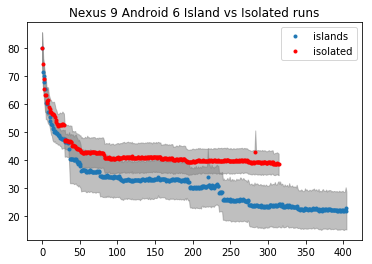

processing island datasets
sizes of average, std and CI lists:  1256 1256 1256
processing isolated datasets
sizes of average, std and CI lists:  529 529 529


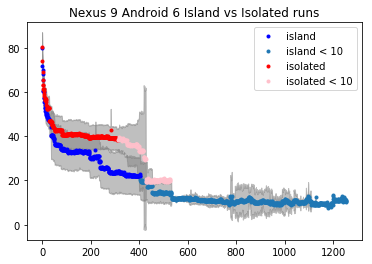

processing island datasets
151 is smaller than 151
151 is smaller than 404
151 is smaller than 193
151 is smaller than 298
151 is smaller than 506
143 is smaller than 143
143 is smaller than 172
105 is smaller than 105
105 is smaller than 140
105 is smaller than 221
sizes of average, std and CI lists:  105 105 105
processing isolated datasets
210 is smaller than 210
88 is smaller than 88
81 is smaller than 81
81 is smaller than 96
81 is smaller than 103
81 is smaller than 99
75 is smaller than 75
75 is smaller than 92
75 is smaller than 80
75 is smaller than 79
sizes of average, std and CI lists:  75 75 75


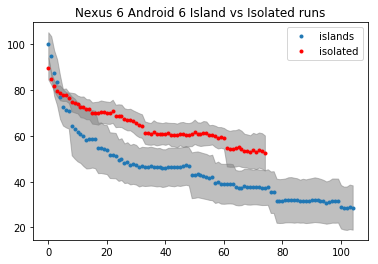

processing island datasets
sizes of average, std and CI lists:  506 506 506
processing isolated datasets
sizes of average, std and CI lists:  210 210 210


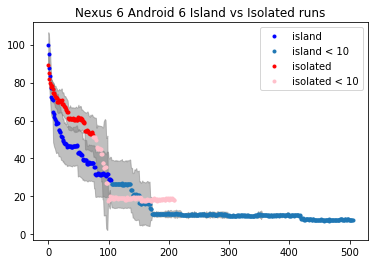

processing island datasets
424 is smaller than 424
424 is smaller than 857
424 is smaller than 567
424 is smaller than 769
424 is smaller than 814
424 is smaller than 442
424 is smaller than 531
424 is smaller than 437
424 is smaller than 482
407 is smaller than 407
sizes of average, std and CI lists:  407 407 407
processing isolated datasets
282 is smaller than 282
221 is smaller than 221
221 is smaller than 290
221 is smaller than 304
221 is smaller than 275
221 is smaller than 468
221 is smaller than 313
221 is smaller than 264
221 is smaller than 340
221 is smaller than 527
sizes of average, std and CI lists:  221 221 221


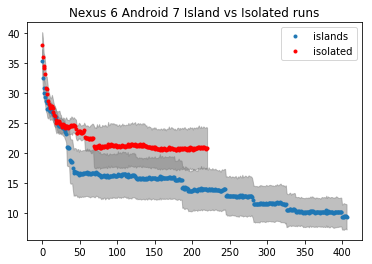

processing island datasets
sizes of average, std and CI lists:  857 857 857
processing isolated datasets
sizes of average, std and CI lists:  527 527 527


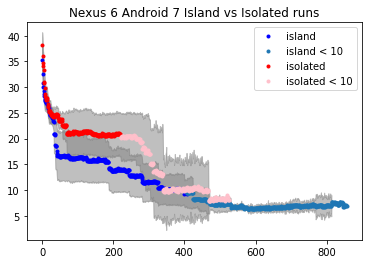

processing island datasets
587 is smaller than 587
587 is smaller than 1611
587 is smaller than 1145
587 is smaller than 1480
587 is smaller than 1472
587 is smaller than 1133
587 is smaller than 855
587 is smaller than 993
587 is smaller than 1007
587 is smaller than 1211
sizes of average, std and CI lists:  587 587 587
processing isolated datasets
953 is smaller than 953
551 is smaller than 551
490 is smaller than 490
398 is smaller than 398
390 is smaller than 390
390 is smaller than 1289
390 is smaller than 860
390 is smaller than 567
390 is smaller than 539
390 is smaller than 424
sizes of average, std and CI lists:  390 390 390


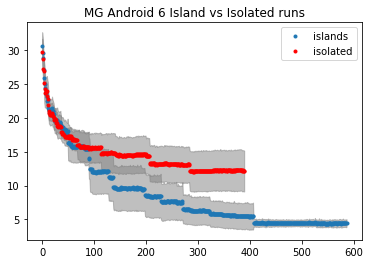

processing island datasets
sizes of average, std and CI lists:  1611 1611 1611
processing isolated datasets
sizes of average, std and CI lists:  1289 1289 1289


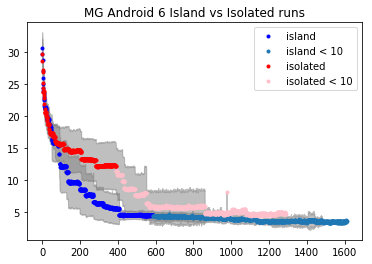

processing island datasets
376 is smaller than 376
376 is smaller than 1189
376 is smaller than 676
376 is smaller than 1052
376 is smaller than 844
376 is smaller than 740
376 is smaller than 602
376 is smaller than 608
376 is smaller than 530
376 is smaller than 609
sizes of average, std and CI lists:  376 376 376
processing isolated datasets
393 is smaller than 393
377 is smaller than 377
377 is smaller than 470
377 is smaller than 512
377 is smaller than 452
377 is smaller than 448
368 is smaller than 368
361 is smaller than 361
284 is smaller than 284
284 is smaller than 521
sizes of average, std and CI lists:  284 284 284


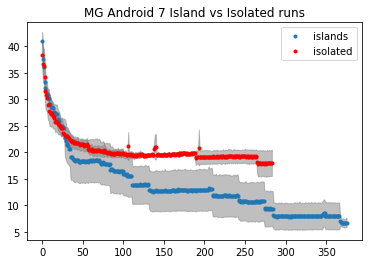

processing island datasets
sizes of average, std and CI lists:  1189 1189 1189
processing isolated datasets
sizes of average, std and CI lists:  521 521 521


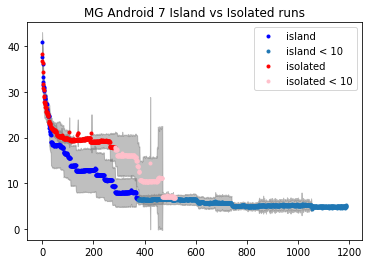

In [10]:
device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N9A6_island_winners, N9A6_isolated_winners, 'Nexus 9 Android 6')
device_island_joules_mean2, device_island_joules_std2, device_island_joules_ci2 = plot_confidence_interval2(N9A6_island_winners, N9A6_isolated_winners, 'Nexus 9 Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N6A6_island_winners, N6A6_isolated_winners, 'Nexus 6 Android 6')
device_island_joules_mean2, device_island_joules_std2, device_island_joules_ci2 = plot_confidence_interval2(N6A6_island_winners, N6A6_isolated_winners, 'Nexus 6 Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N6A7_island_winners, N6A7_isolated_winners, 'Nexus 6 Android 7')
device_island_joules_mean2, device_island_joules_std2, device_island_joules_ci2 = plot_confidence_interval2(N6A7_island_winners, N6A7_isolated_winners, 'Nexus 6 Android 7')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(MGA6_island_winners, MGA6_isolated_winners, 'MG Android 6')
device_island_joules_mean2, device_island_joules_std2, device_island_joules_ci2 = plot_confidence_interval2(MGA6_island_winners, MGA6_isolated_winners, 'MG Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(MGA7_island_winners, MGA7_isolated_winners, 'MG Android 7')
device_island_joules_mean2, device_island_joules_std2, device_island_joules_ci2 = plot_confidence_interval2(MGA7_island_winners, MGA7_isolated_winners, 'MG Android 7')


processing island datasets
454 is smaller than 454
454 is smaller than 786
454 is smaller than 679
454 is smaller than 1111
454 is smaller than 1256
437 is smaller than 437
437 is smaller than 534
437 is smaller than 529
437 is smaller than 743
405 is smaller than 405
sizes of average, std and CI lists:  405 405 405
processing isolated datasets
344 is smaller than 344
344 is smaller than 419
344 is smaller than 400
344 is smaller than 352
344 is smaller than 529
335 is smaller than 335
315 is smaller than 315
315 is smaller than 428
315 is smaller than 350
315 is smaller than 392
sizes of average, std and CI lists:  315 315 315


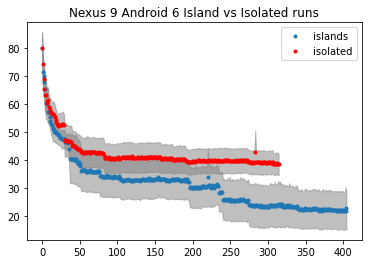

processing island datasets
151 is smaller than 151
151 is smaller than 404
151 is smaller than 193
151 is smaller than 298
151 is smaller than 506
143 is smaller than 143
143 is smaller than 172
105 is smaller than 105
105 is smaller than 140
105 is smaller than 221
sizes of average, std and CI lists:  105 105 105
processing isolated datasets
210 is smaller than 210
88 is smaller than 88
81 is smaller than 81
81 is smaller than 96
81 is smaller than 103
81 is smaller than 99
75 is smaller than 75
75 is smaller than 92
75 is smaller than 80
75 is smaller than 79
sizes of average, std and CI lists:  75 75 75


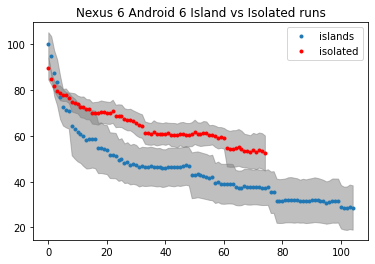

processing island datasets
424 is smaller than 424
424 is smaller than 857
424 is smaller than 567
424 is smaller than 769
424 is smaller than 814
424 is smaller than 442
424 is smaller than 531
424 is smaller than 437
424 is smaller than 482
407 is smaller than 407
sizes of average, std and CI lists:  407 407 407
processing isolated datasets
282 is smaller than 282
221 is smaller than 221
221 is smaller than 290
221 is smaller than 304
221 is smaller than 275
221 is smaller than 468
221 is smaller than 313
221 is smaller than 264
221 is smaller than 340
221 is smaller than 527
sizes of average, std and CI lists:  221 221 221


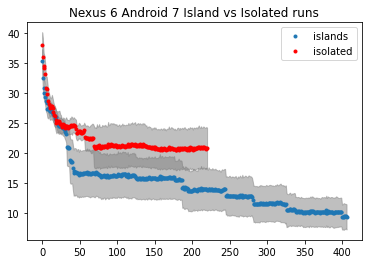

processing island datasets
587 is smaller than 587
587 is smaller than 1611
587 is smaller than 1145
587 is smaller than 1480
587 is smaller than 1472
587 is smaller than 1133
587 is smaller than 855
587 is smaller than 993
587 is smaller than 1007
587 is smaller than 1211
sizes of average, std and CI lists:  587 587 587
processing isolated datasets
953 is smaller than 953
551 is smaller than 551
490 is smaller than 490
398 is smaller than 398
390 is smaller than 390
390 is smaller than 1289
390 is smaller than 860
390 is smaller than 567
390 is smaller than 539
390 is smaller than 424
sizes of average, std and CI lists:  390 390 390


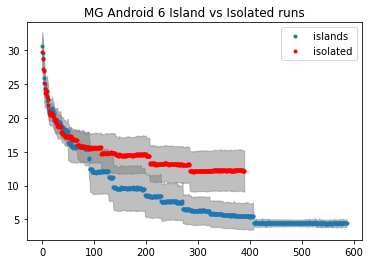

processing island datasets
376 is smaller than 376
376 is smaller than 1189
376 is smaller than 676
376 is smaller than 1052
376 is smaller than 844
376 is smaller than 740
376 is smaller than 602
376 is smaller than 608
376 is smaller than 530
376 is smaller than 609
sizes of average, std and CI lists:  376 376 376
processing isolated datasets
393 is smaller than 393
377 is smaller than 377
377 is smaller than 470
377 is smaller than 512
377 is smaller than 452
377 is smaller than 448
368 is smaller than 368
361 is smaller than 361
284 is smaller than 284
284 is smaller than 521
sizes of average, std and CI lists:  284 284 284


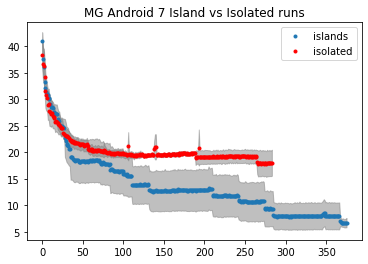

In [86]:
device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N9A6_island_winners, N9A6_isolated_winners, 'Nexus 9 Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N6A6_island_winners, N6A6_isolated_winners, 'Nexus 6 Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(N6A7_island_winners, N6A7_isolated_winners, 'Nexus 6 Android 7')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(MGA6_island_winners, MGA6_isolated_winners, 'MG Android 6')

device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(MGA7_island_winners, MGA7_isolated_winners, 'MG Android 7')



processing island datasets
587 is smaller than 587
587 is smaller than 1611
587 is smaller than 1145
587 is smaller than 1480
587 is smaller than 1472
587 is smaller than 1133
587 is smaller than 855
587 is smaller than 993
587 is smaller than 1007
587 is smaller than 1211
sizes of average, std and CI lists:  587 587 587
processing isolated datasets
953 is smaller than 953
551 is smaller than 551
490 is smaller than 490
398 is smaller than 398
390 is smaller than 390
390 is smaller than 1289
390 is smaller than 860
390 is smaller than 567
390 is smaller than 539
390 is smaller than 424
sizes of average, std and CI lists:  390 390 390


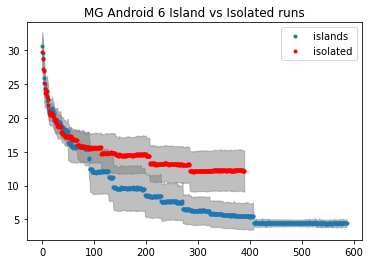

3.1622776601683795
last 100 CI points:  [0.47279394 0.47452805 0.48759236 0.4922889  0.50158492 0.49670362
 0.48896913 0.47301382 0.48148732 0.51140707 0.49411671 0.51983691
 0.49002829 0.47702398 0.51893515 0.49151854 0.46390127 0.47692811
 0.54498331 0.50419129 0.53837587 0.50198428 0.55182786 0.53272124
 0.53744885 0.53612052 0.48903822 0.56523695 0.51904066 0.50649852
 0.51439132 0.53432465 0.54973634 0.53507802 0.56319626 0.48180421
 0.47301567 0.50242506 0.59331177 0.50443559 0.5633788  0.59801433
 0.54835067 0.557044   0.54996677 0.55523397 0.6330477  0.56103707
 0.5676491  0.56206977 0.58770101 0.53540453 0.56430864 0.57594406
 0.54157351 0.54785486 0.56116996 0.54874094 0.52698494 0.54422118
 0.51895143 0.51764766 0.5143262  0.54849672 0.54436032 0.55220776
 0.5549228  0.54726334 0.52509959 0.52445353 0.56537091 0.52810685
 0.54105426 0.59712478 0.58838059 0.59646297 0.56178417 0.55999778
 0.59624807 0.58859985 0.59341584 0.56796509 0.55417066 0.55585893
 0.56924828 0.62812799

In [89]:
# inspecting MGA6 islands
device_island_joules_mean, device_island_joules_std, device_island_joules_ci = plot_confidence_interval(MGA6_island_winners, MGA6_isolated_winners, 'MG Android 6')
print(np.sqrt(10))
print('last 100 CI points: ',device_island_joules_ci[-100:])
print('last 100 std points: ',device_island_joules_mean[-100:])
print('last 100 mean points: ',device_island_joules_std[-100:])


In [6]:
# Extract immigrants, then store them without repetions (unique)

N9A6_immigrants_dataframe_list = extract_imigrants_list(N9A6, 'nexus 9.M')
#immigrants_dataframe_list[0].head()
N9A6_immigrants_unique_dataframe_list = remove_duplicates(N9A6_immigrants_dataframe_list, ['parent'])


N6A6_immigrants_dataframe_list = extract_imigrants_list(N6A6, 'nexus 6.M')
#immigrants_dataframe_list[0].head()
N6A6_immigrants_unique_dataframe_list = remove_duplicates(N6A6_immigrants_dataframe_list, ['parent'])


N6A7_immigrants_dataframe_list = extract_imigrants_list(N6A7, 'nexus 6.N')
#immigrants_dataframe_list[0].head()
N6A7_immigrants_unique_dataframe_list = remove_duplicates(N6A7_immigrants_dataframe_list, ['parent'])


MGA6_immigrants_dataframe_list = extract_imigrants_list(MGA6, 'moto g play.M') 
#immigrants_dataframe_list[0].head()
MGA6_immigrants_unique_dataframe_list = remove_duplicates(MGA6_immigrants_dataframe_list, ['parent'])


MGA7_immigrants_dataframe_list = extract_imigrants_list(MGA7, 'moto g play.N') 
#immigrants_dataframe_list[0].head()
MGA7_immigrants_unique_dataframe_list = remove_duplicates(MGA7_immigrants_dataframe_list, ['parent'])


In [7]:
# find the most winnin immigrant for each experiment, find the most winning immigrant across all experiments

# most_winning_immigrant_all_experiments is a dictionary with key:immigrant and value:number of wins
most_winning_immigrant_all_experiments = find_max_winner(N9A6_immigrants_unique_dataframe_list)
print("most winning per experiment on Nexus 9 Android 6", most_winning_immigrant_all_experiments)
print("most winning immigrant across all experiments on Nexus 9 Android 6", get_max_in_dictionary(most_winning_immigrant_all_experiments))

most_winning_immigrant_all_experiments = find_max_winner(N6A6_immigrants_dataframe_list)
print("most winning per experiment on Nexus 6 Android 6 ", most_winning_immigrant_all_experiments)
print("most winning immigrant across all experiments on Nexus 6 Android 6", get_max_in_dictionary(most_winning_immigrant_all_experiments))

most_winning_immigrant_all_experiments = find_max_winner(N6A7_immigrants_dataframe_list)
print("most winning per experiment on Nexus 6 Android 7 (-1 is the original): ", most_winning_immigrant_all_experiments)
print("most winning immigrant across all experiments on Nexus 6 Android 7", get_max_in_dictionary(most_winning_immigrant_all_experiments))

most_winning_immigrant_all_experiments = find_max_winner(MGA6_immigrants_dataframe_list)
print("most winning per experiment on Moto G Android 6 ", most_winning_immigrant_all_experiments)
print("most winning immigrant across all experiments on Moto G Android 6", get_max_in_dictionary(most_winning_immigrant_all_experiments))

most_winning_immigrant_all_experiments = find_max_winner(MGA7_immigrants_dataframe_list)
print("most winning per experiment on Moto G Android 7", most_winning_immigrant_all_experiments)
print("most winning immigrant across all experiments on Moto G Android 7", get_max_in_dictionary(most_winning_immigrant_all_experiments))


most winning per experiment on Nexus 9 Android 6 {'nexus 6.M.30.31': 0, 'nexus 6.M.22.25': 0, 'nexus 6.M.39.43': 0, 'nexus 6.M.22.30': 0, 'nexus 6.M.17.22': 0, 'moto g play.N.1537.1540': 0, 'nexus 6.M.13.31': 0, 'nexus 6.M.18.20': 0, 'nexus 6.M.0.7': 0}
most winning immigrant across all experiments on Nexus 9 Android 6 ('nexus 6.M.30.31', 0)
most winning per experiment on Nexus 6 Android 6  {'nexus 6.N.80.90': 0, 'nexus 6.N.82.83': 3, 'nexus 6.N.274.276': 1, 'nexus 6.N.191.192': 4, 'nexus 6.N.218.251': 14, 'moto g play.M.2248.2250': 2, 'moto g play.M.572.575': 4, 'nexus 9.M.682.683': 5, 'moto g play.M.243.248': 9, 'nexus 9.M.168.171': 8}
most winning immigrant across all experiments on Nexus 6 Android 6 ('nexus 6.N.218.251', 14)
most winning per experiment on Nexus 6 Android 7 (-1 is the original):  {'nexus 9.M.98.107': 6, 'nexus 9.M.318.326': 2, 'moto g play.N.861.863': 3, 'moto g play.M.649.654': 5, 'moto g play.M.1049.1061': 2, 'nexus 6.M.749.750': 2, 'moto g play.M.871.874': 3, 'ne

#2
### Now check how solutions created out of a successfull immigrant evolved differently from the last winner before the immigration happened.

min dist: 1.9089925705248403
min dist: 29.090372713180578
min dist: 47.359276095211726
min dist: 0.0
min dist: 6.149855824481761
min dist: 17.543600541198312
min dist: 6.659319608677923
min dist: 4.980574605481971
min dist: 38.131871326933755
min dist: 45.785820570279476


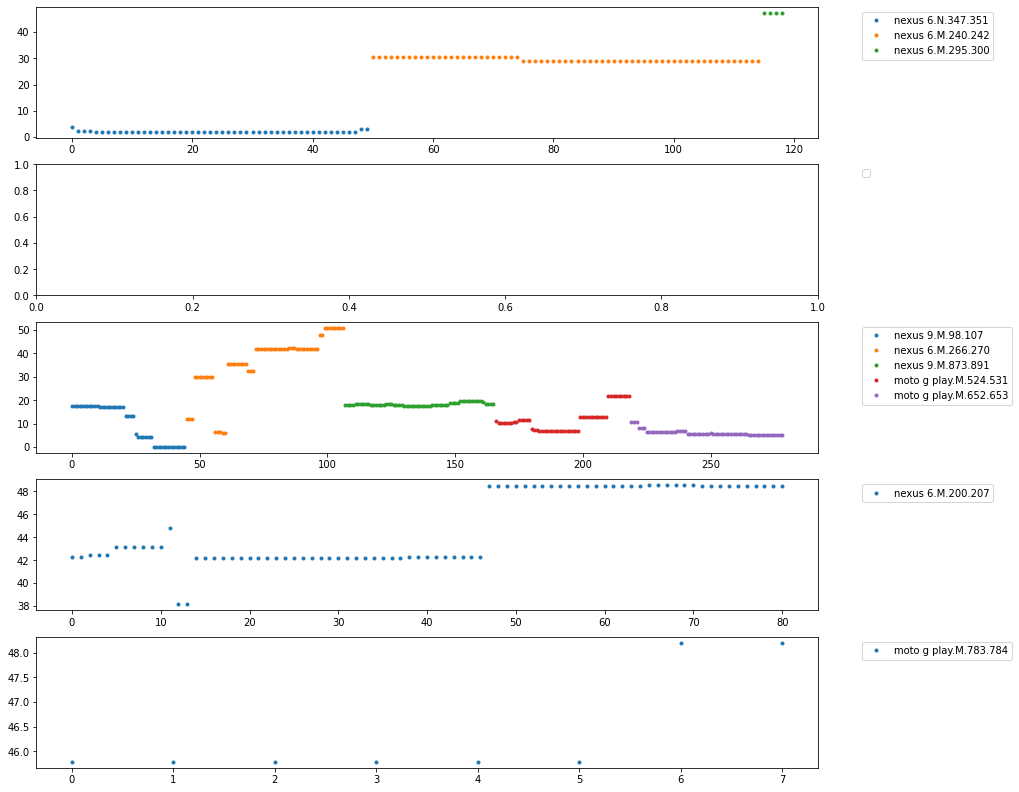

In [48]:
def compute_dist_from_last_solution_before_immigration(device_exp_log, immigrant_list):
    """For each immigrant, compute the euclidean distance between the last solution before the immigration happened and the subsequent solutions.
    This will trace how the decision variables evolve between each immigration operation in the experiment.
    :param device_exp_log a dataframe containing the experiment data (one experiment)
    :param immigrant_list a dataframe containing the immigrants
    :return a list of lists containing the euclidean distances."""
    
    # note the immigrant always is saved after its opponent
    result = []
    for immigrant_number in range(0, len(immigrant_list)):
     
        if immigrant_list.iloc[immigrant_number, 16]:
            ind = immigrant_list.index
            immig_structure = immigrant_list.iloc[immigrant_number, 0:5].values
            #print("immigrant structure: ", immig_structure)
    
            opponent = np.float64(device_exp_log.iloc[ind[1] - 1, 0:5].values)
            # print("opponent: ", opponent)
            dist = []
            if immigrant_number == len(ind)-1: to_ = len(device_exp_log)-1
            else: to_ = ind[immigrant_number+1]
            for i in range(ind[immigrant_number]+1, to_): # from one immigrant to the next one
                if device_exp_log.iloc[i, 16]:
                    # euclidean distance if it's a winner only
                    dist.append(np.linalg.norm(opponent - np.float64(device_exp_log.iloc[i, 0:5].values)))  # weird sometimes it reads the variables as string!!! (n6a7 exp 6 row 726)
            result.append(dist)
            print("min dist:", min(dist))
    return result
# test the function:
exp_num=0

title_font_size = 24
label_font_size = 22

fig, axs = plt.subplots(5, figsize=(14, 14))

distances = compute_dist_from_last_solution_before_immigration(N9A6[exp_num], N9A6_immigrants_unique_dataframe_list[exp_num])
legends = N9A6_immigrants_unique_dataframe_list[exp_num].loc[N9A6_immigrants_unique_dataframe_list[exp_num]['wasFitter']]['parent']
  
count=0
for dist in distances:
    axs[0].plot(range(count, len(dist)+count), dist, '.') 
    count += len(dist)
axs[0].legend(legends, bbox_to_anchor=(1.05, 1), loc='upper left')

distances = compute_dist_from_last_solution_before_immigration(N6A6[exp_num], N6A6_immigrants_unique_dataframe_list[exp_num])
legends = N6A6_immigrants_unique_dataframe_list[exp_num].loc[N6A6_immigrants_unique_dataframe_list[exp_num]['wasFitter']]['parent']
    
count=0
for dist in distances:
    axs[1].plot(range(count, len(dist)+count), dist, '.') 
    count += len(dist)
axs[1].legend(legends, bbox_to_anchor=(1.05, 1), loc='upper left')

distances = compute_dist_from_last_solution_before_immigration(N6A7[exp_num], N6A7_immigrants_unique_dataframe_list[exp_num])
legends = N6A7_immigrants_unique_dataframe_list[exp_num].loc[N6A7_immigrants_unique_dataframe_list[exp_num]['wasFitter']]['parent']
   
count=0
for dist in distances:
    axs[2].plot(range(count, len(dist)+count), dist, '.') 
    count += len(dist)
axs[2].legend(legends, bbox_to_anchor=(1.05, 1), loc='upper left')

distances = compute_dist_from_last_solution_before_immigration(MGA6[exp_num], MGA6_immigrants_unique_dataframe_list[exp_num])
legends = MGA6_immigrants_unique_dataframe_list[exp_num].loc[MGA6_immigrants_unique_dataframe_list[exp_num]['wasFitter']]['parent']
   
count=0
for dist in distances:
    axs[3].plot(range(count, len(dist)+count), dist, '.') 
    count += len(dist)
axs[3].legend(legends, bbox_to_anchor=(1.05, 1), loc='upper left')

distances = compute_dist_from_last_solution_before_immigration(MGA7[exp_num], MGA7_immigrants_unique_dataframe_list[exp_num])
legends = MGA7_immigrants_unique_dataframe_list[exp_num].loc[MGA7_immigrants_unique_dataframe_list[exp_num]['wasFitter']]['parent']


count=0
for dist in distances:
    axs[4].plot(range(count, len(dist)+count), dist, '.') 
    count += len(dist)
axs[4].legend(legends, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#3
### Now check how the solutions created out of an immigrant evovled differently from the last native solution.

immigrant structure:  [0.0009999999999999998 1.633390862850619 40.834678452811 1.683780079685774
 2.243333039277436]
min dist 7.642716162123274


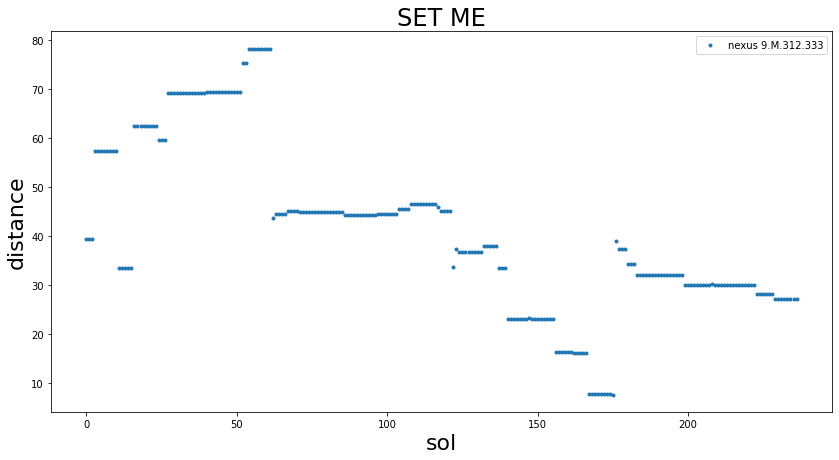

In [49]:

def compute_dist_from_reference_solution(device_exp_log, immigrant_list):
    """"""
    # note the immigrant always is saved after its opponent
    for immigrant_number in range(1, len(immigrant_list)):
        
        if immigrant_list.iloc[immigrant_number, 16]:
            ind = immigrant_list.index
            immig_structure = immigrant_list.iloc[immigrant_number, 0:5].values
            print("immigrant structure: ", immig_structure)

            # this solution (native_solution) is a native one, i.e. it was created before the first immigration.
            # I'm using it as a reference point. This solution is the last survival of the current device native solutions in case of a successful migration.
            native_solution = np.float64(device_exp_log.iloc[ind[0] - 1, 0:5].values)
            # print("native: ", native_solution)
            dist = []
            for i in range(ind[immigrant_number] + 1, len(device_exp_log)-1):
                if device_exp_log.iloc[i, 16]:
                    # euclidean distance if it's a winner only
                    dist.append(np.linalg.norm(native_solution - np.float64(device_exp_log.iloc[i,
                                                                           0:5].values)))  # weird sometimes it reads the variables as string!!! (n6a7 exp 6 row 726)
            print("min dist", min(dist))
            return dist # return, no need to check the other immigrants
        
        
# test the function:
distances = compute_dist_from_reference_solution(N6A7[0], N6A7_immigrants_unique_dataframe_list[0])

title_font_size = 24
label_font_size = 22
plt.figure(figsize=(14, 7))
plt.plot(range(len(distances)), distances, '.')
plt.legend(N6A7_immigrants_unique_dataframe_list[0]['parent'][1:], loc='best')
plt.title("SET ME", fontsize=title_font_size)
plt.xlabel("sol", fontsize=label_font_size)
plt.ylabel("distance", fontsize=label_font_size)
plt.show()

### plot immigrant and native data per device

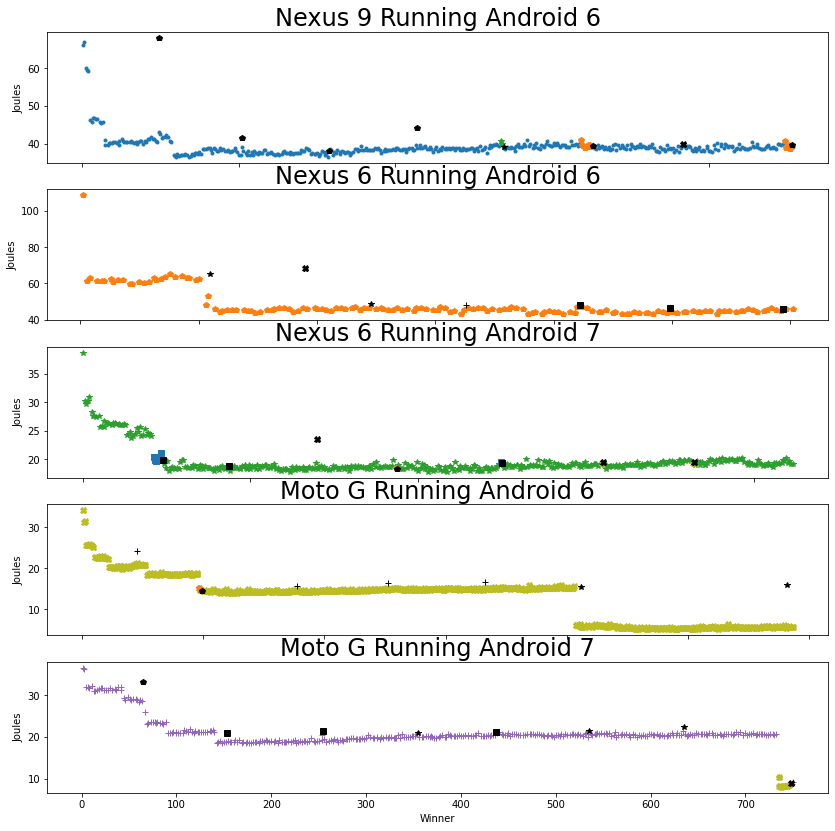

In [50]:
def plot_immigrants (ax_, immigrant_list):
    
    device_markers = {'nexus 9': 's', 'nexus 6.M': 'p', 'nexus 6.N': '*', 'moto g play.M': 'X', 'moto g play.N': '+'}
    device_colors = {'nexus 9': 'tab:blue', 'nexus 6.M': 'tab:orange', 'nexus 6.N': 'tab:green', 'moto g play.M': 'tab:olive', 'moto g play.N': 'tab:purple'}
    for ind, immigrant in immigrant_list.iterrows():
        for device_key in device_markers.keys():
            if immigrant['parent'].startswith(device_key):
                if immigrant['wasFitter']:
                    ax_.plot(ind, immigrant['joules'], device_markers[device_key], color=device_colors[device_key])
                else:
                    ax_.plot(ind, immigrant['joules'], device_markers[device_key], color="black")
                    
exp_num=0

title_font_size = 24
label_font_size = 22

fig, axs = plt.subplots(5, figsize=(14, 14))
just_fot_plot = N9A6[exp_num].loc[N9A6[exp_num]['wasFitter']]
axs[0].plot(just_fot_plot.index, just_fot_plot['joules'], '.', color='tab:blue')
plot_immigrants(axs[0], N9A6_immigrants_dataframe_list[exp_num])
axs[0].set_title("Nexus 9 Running Android 6", fontsize=title_font_size)

just_fot_plot = N6A6[exp_num].loc[N6A6[exp_num]['wasFitter']]
axs[1].plot(just_fot_plot.index, just_fot_plot['joules'], "p", color='tab:orange')
plot_immigrants(axs[1], N6A6_immigrants_dataframe_list[exp_num])
axs[1].set_title("Nexus 6 Running Android 6", fontsize=title_font_size)


just_fot_plot = N6A7[exp_num].loc[N6A7[exp_num]['wasFitter']]
axs[2].plot(just_fot_plot['joules'], "*", color='tab:green')
plot_immigrants(axs[2], N6A7_immigrants_dataframe_list[exp_num])
axs[2].set_title("Nexus 6 Running Android 7", fontsize=title_font_size)


just_fot_plot = MGA6[exp_num].loc[MGA6[exp_num]['wasFitter']]
axs[3].plot(just_fot_plot['joules'], "X", color='tab:olive')
plot_immigrants(axs[3], MGA6_immigrants_dataframe_list[exp_num])
axs[3].set_title("Moto G Running Android 6", fontsize=title_font_size)


just_fot_plot = MGA7[exp_num].loc[MGA7[exp_num]['wasFitter']]
axs[4].plot(just_fot_plot['joules'], "+", color='tab:purple')
plot_immigrants(axs[4], MGA7_immigrants_dataframe_list[exp_num])
axs[4].set_title("Moto G Running Android 7", fontsize=title_font_size)

for ax in axs.flat:
    ax.set(xlabel='Winner', ylabel='Joules')

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

#4
### Now plot immigrant and native data. Once the migration is successful, the new breed changes to the immigrant beed.

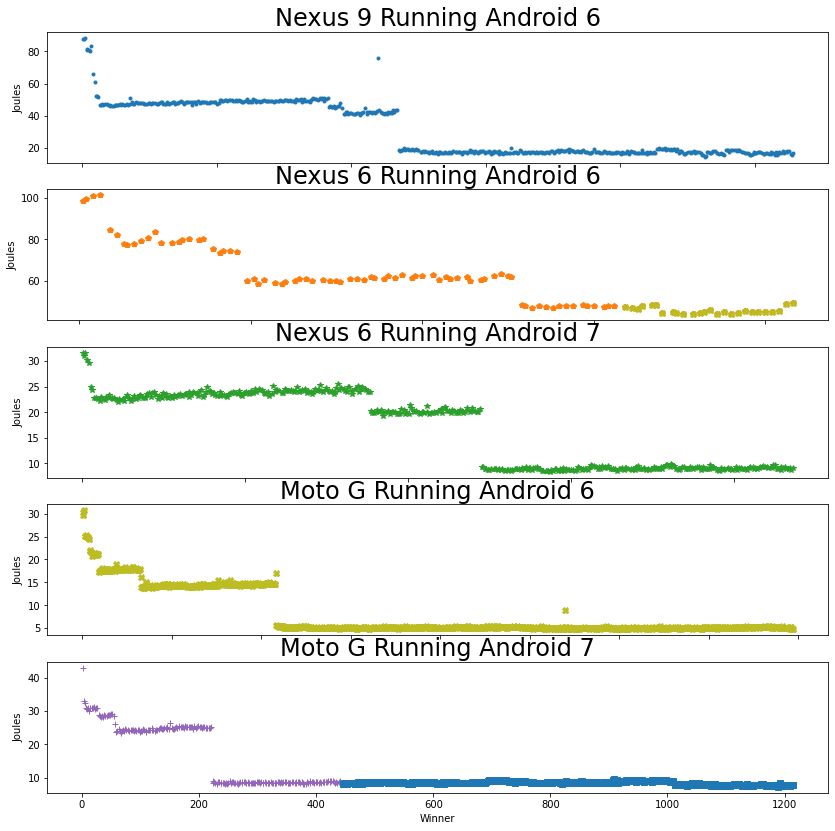

In [51]:

######################## BUGGY NOT READY YET ###############################

device_markers = {'nexus 9.M': 's', 'nexus 6.M': 'p', 'nexus 6.N': '*', 'moto g play.M': 'X', 'moto g play.N': '+'}
device_colors = {'nexus 9.M': 'tab:blue', 'nexus 6.M': 'tab:orange', 'nexus 6.N': 'tab:green', 'moto g play.M': 'tab:olive', 'moto g play.N': 'tab:purple'}
    

def plot_data_heritage (ax_, data, successfull_unique_immigrant_list):
    successfull_unique_immigrant_list = successfull_unique_immigrant_list.loc[successfull_unique_immigrant_list['wasFitter']]
    immigrant_indicies = list(successfull_unique_immigrant_list.index)
    if len(immigrant_indicies) > 1:
        del immigrant_indicies[0]
        #print(immigrant_indicies)
        immigrant_indicies.append(len(data)-1) # this to print from the last successful immigrant to the end of the dataset.
        counter=0
        #print(immigrant_indicies)
        for i in range(len(immigrant_indicies)-1):
            #print(i)
            device_key = list(successfull_unique_immigrant_list['parent'])[counter].split(".")
            device_key = device_key[0]+"."+device_key[1]
            #print(device_key)
            ax_.plot(data['joules'][immigrant_indicies[i]:immigrant_indicies[i+1]], device_markers[device_key], color=device_colors[device_key])
            counter+=1
exp_num=7

title_font_size = 24
label_font_size = 22

fig, axs = plt.subplots(5, figsize=(14, 14))
just_fot_plot = N9A6[exp_num].loc[N9A6[exp_num]['wasFitter']]
axs[0].plot(just_fot_plot.index, just_fot_plot['joules'], '.', color='tab:blue')
plot_data_heritage(axs[0], just_fot_plot, N9A6_immigrants_unique_dataframe_list[exp_num])
axs[0].set_title("Nexus 9 Running Android 6", fontsize=title_font_size)

just_fot_plot = N6A6[exp_num].loc[N6A6[exp_num]['wasFitter']]
successfull_unique_immigrant_list = just_fot_plot[~just_fot_plot['parent'].str.contains("nexus 6.M")]
successfull_unique_immigrant_list = successfull_unique_immigrant_list.drop_duplicates(subset="parent", keep='first')


axs[1].plot(just_fot_plot.index, just_fot_plot['joules'], "p", color='tab:orange')
plot_data_heritage(axs[1], just_fot_plot, N6A6_immigrants_unique_dataframe_list[exp_num])
axs[1].set_title("Nexus 6 Running Android 6", fontsize=title_font_size)


just_fot_plot = N6A7[exp_num].loc[N6A7[exp_num]['wasFitter']]
axs[2].plot(just_fot_plot['joules'], "*", color='tab:green')
plot_data_heritage(axs[2], just_fot_plot, N6A7_immigrants_unique_dataframe_list[exp_num])
axs[2].set_title("Nexus 6 Running Android 7", fontsize=title_font_size)


just_fot_plot = MGA6[exp_num].loc[MGA6[exp_num]['wasFitter']]
axs[3].plot(just_fot_plot['joules'], "X", color='tab:olive')
plot_data_heritage(axs[3], just_fot_plot, MGA6_immigrants_unique_dataframe_list[exp_num])
axs[3].set_title("Moto G Running Android 6", fontsize=title_font_size)


just_fot_plot = MGA7[exp_num].loc[MGA7[exp_num]['wasFitter']]
axs[4].plot(just_fot_plot['joules'], "+", color='tab:purple')
plot_data_heritage(axs[4], just_fot_plot, MGA7_immigrants_unique_dataframe_list[exp_num])
axs[4].set_title("Moto G Running Android 7", fontsize=title_font_size)

for ax in axs.flat:
    ax.set(xlabel='Winner', ylabel='Joules')

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

#5
### plot all experiments with immigrants

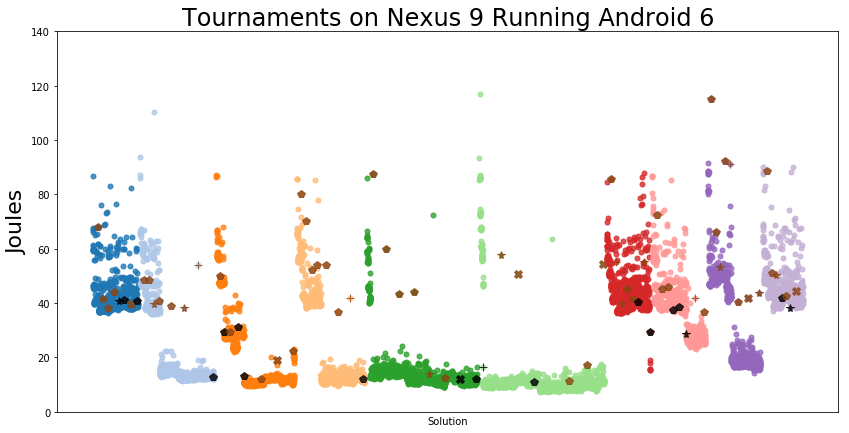

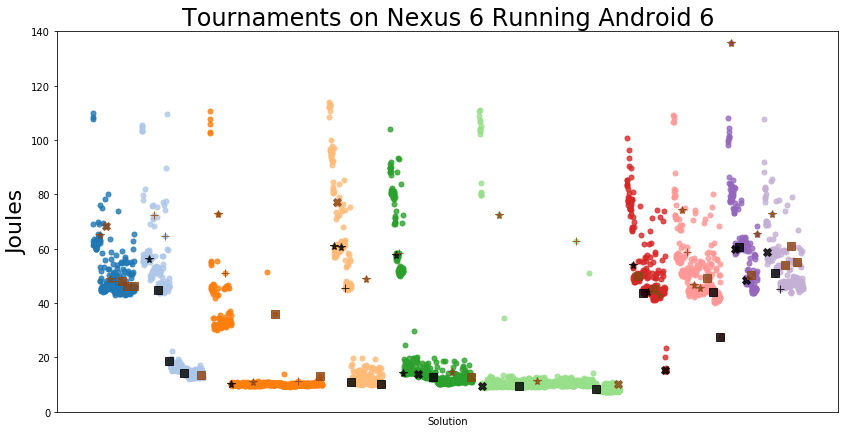

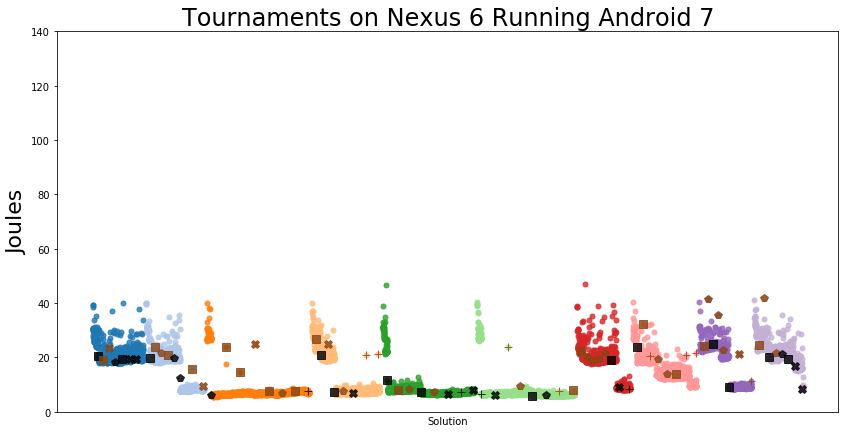

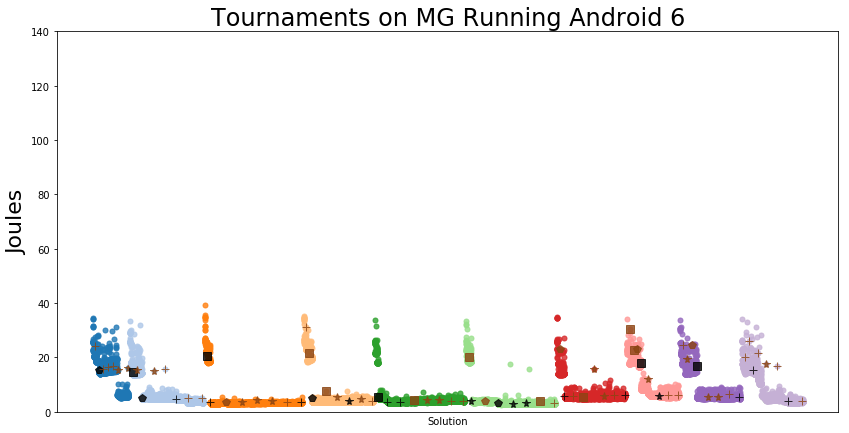

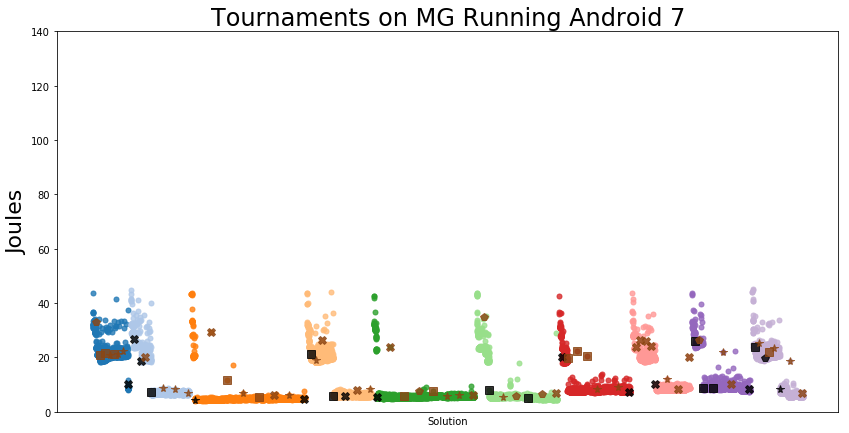

In [8]:

def plot_devices_experiments_with_immigrants(device_dataframes_list, immigrants_dataframes_list, plot_title, column_name='joules'):
    # %% plot data
    title_font_size = 24
    label_font_size = 22
    myColors = ()
    space_between_exp = 50
    # device_markers = ['nexus 9', 'nexus 6.M', 'nexus 6.N', 'moto g play.M', 'moto g play.N']
    device_markers = {'nexus 9': 's', 'nexus 6.M': 'p', 'nexus 6.N': '*', 'moto g play.M': 'X', 'moto g play.N': '+'}
    for i in range(len(device_dataframes_list)):
        myColors = myColors + (plt.get_cmap('tab20').colors[i],)

    # figTemp, axTemp = create_plot_several_experiments_in_sequence(device_dataframes_list, columnName, '.', 10, 0.8, space_between_exp,
    #                                                               myColors)
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(1, 1, 1)
    counter = 0
    start: int = 1
    for i in range(len(device_dataframes_list)):
        end_index = start + len(device_dataframes_list[i][column_name])
        plt.plot(range(start, end_index), device_dataframes_list[i][column_name], '.', markersize=10,
                 alpha=0.8, color=myColors[counter])

        immig_starts = immigrants_dataframes_list[i].index + start  # now shift all immigrants indices by start
        immig_starts_counter = 0
        for parent in immigrants_dataframes_list[i]['parent']:
            for device_key in device_markers.keys():
                if parent.startswith(device_key):
                    if immigrants_dataframes_list[i]['wasFitter'][
                        immig_starts[immig_starts_counter] - start]:
                        plt.plot(immig_starts[immig_starts_counter],
                                 immigrants_dataframes_list[i][column_name][
                                     immig_starts[immig_starts_counter] - start],
                                 device_markers[device_key], markersize=8, alpha=0.8, color='black')
                    else:
                        plt.plot(immig_starts[immig_starts_counter],
                                 immigrants_dataframes_list[i][column_name][
                                     immig_starts[immig_starts_counter] - start],
                                 device_markers[device_key], markersize=8, alpha=0.8, color='saddlebrown')
                    immig_starts_counter += 1

        # plt.axvline(x=end_index+1)
        start = end_index + space_between_exp  # now shift the start of each experiment data points by space_between_exp.
        counter += 1

    ax.set_title(plot_title)
    ax.set_ylabel("Joules")
    ax.set_xlabel("Solution")
    ax.title.set_fontsize(title_font_size)
    ax.yaxis.label.set_fontsize(label_font_size)
    ax.set_xticks([], [])
    plt.ylim(0, 140)
    ax.grid(False)

    if is_save_plots: save_figure(plots_dir,
                               plot_title,
                               deviceName, OS, fig)
    #fig.show()

plot_devices_experiments_with_immigrants(N9A6, N9A6_immigrants_unique_dataframe_list, 'Tournaments on Nexus 9 Running Android 6')
plot_devices_experiments_with_immigrants(N6A6, N6A6_immigrants_unique_dataframe_list, 'Tournaments on Nexus 6 Running Android 6')
plot_devices_experiments_with_immigrants(N6A7, N6A7_immigrants_unique_dataframe_list, 'Tournaments on Nexus 6 Running Android 7')
plot_devices_experiments_with_immigrants(MGA6, MGA6_immigrants_unique_dataframe_list, 'Tournaments on MG Running Android 6')
plot_devices_experiments_with_immigrants(MGA7, MGA7_immigrants_unique_dataframe_list, 'Tournaments on MG Running Android 7')
# avg performance per device with immigration on/off

nexus 9.M received successful:  {'nexus 9.M': 0, 'nexus 6.M': 14, 'nexus 6.N': 3, 'moto g play.M': 1, 'moto g play.N': 1}
nexus 6.M received successful:  {'nexus 9.M': 13, 'nexus 6.M': 0, 'nexus 6.N': 8, 'moto g play.M': 6, 'moto g play.N': 2}
nexus 6.N received successful:  {'nexus 9.M': 14, 'nexus 6.M': 6, 'nexus 6.N': 0, 'moto g play.M': 9, 'moto g play.N': 4}
moto g play.M received successful:  {'nexus 9.M': 5, 'nexus 6.M': 4, 'nexus 6.N': 5, 'moto g play.M': 0, 'moto g play.N': 10}
moto g play.N received successful:  {'nexus 9.M': 9, 'nexus 6.M': 1, 'nexus 6.N': 2, 'moto g play.M': 10, 'moto g play.N': 0}
+----------------------+-----------+-----------+-----------+---------------+---------------+
| sent to (successful) | nexus 9.M | nexus 6.M | nexus 6.N | moto g play.M | moto g play.N |
+----------------------+-----------+-----------+-----------+---------------+---------------+
|      nexus 9.M       |    0.0    |    13.0   |    14.0   |      5.0      |      9.0      |
|      nex

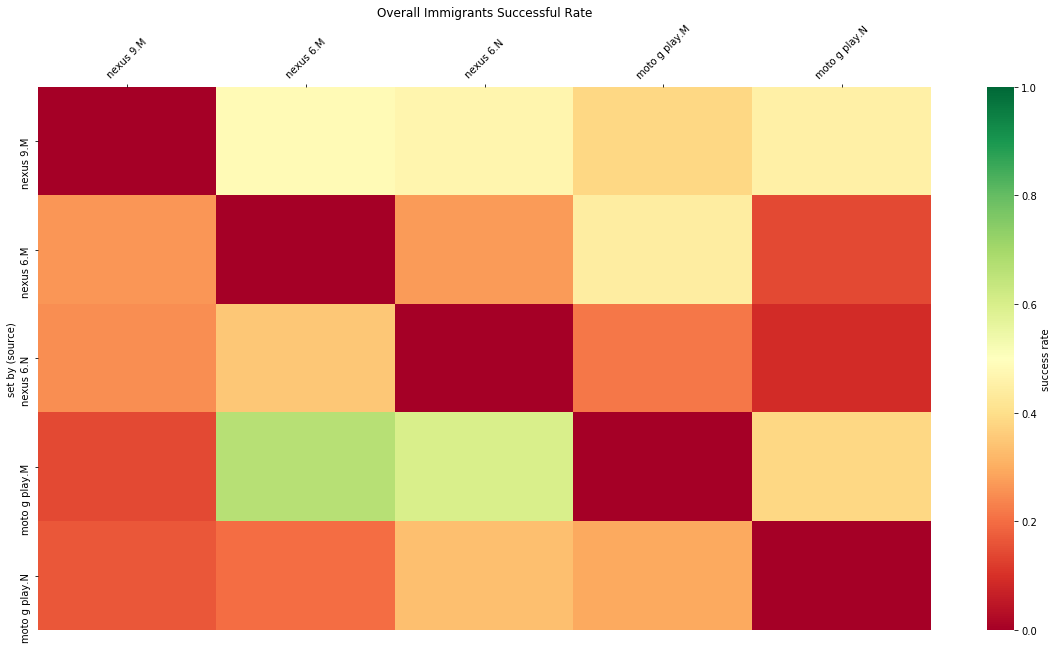

nexus 9.M received successful:  {'nexus 6.N': {50: 1, 40: 2}, 'nexus 6.M': {40: 2, 20: 5, 80: 1, 60: 4, 50: 2}, 'moto g play.M': {30: 1}, 'moto g play.N': {90: 1}}
nexus 6.M received successful:  {'nexus 6.N': {80: 4, 60: 3, 50: 1}, 'nexus 9.M': {60: 3, 40: 3, 30: 3, 20: 2, 70: 2}, 'moto g play.N': {50: 1, 60: 1}, 'moto g play.M': {50: 1, 90: 2, 20: 1, 70: 1, 40: 1}}
nexus 6.N received successful:  {'nexus 9.M': {90: 4, 50: 2, 80: 1, 60: 2, 40: 3, 70: 2}, 'nexus 6.M': {60: 1, 50: 2, 40: 2, 90: 1}, 'moto g play.M': {40: 3, 30: 3, 20: 2, 80: 1}, 'moto g play.N': {20: 2, 30: 1, 90: 1}}
moto g play.M received successful:  {'nexus 6.M': {80: 1, 70: 2, 60: 1}, 'nexus 9.M': {90: 3, 60: 2}, 'moto g play.N': {40: 1, 80: 3, 20: 3, 70: 2, 30: 1}, 'nexus 6.N': {40: 3, 80: 1, 50: 1}}
moto g play.N received successful:  {'moto g play.M': {20: 4, 90: 3, 70: 1, 40: 1, 50: 1}, 'nexus 9.M': {50: 2, 90: 3, 70: 2, 40: 1, 60: 1}, 'nexus 6.N': {90: 1, 40: 1}, 'nexus 6.M': {70: 1}}
nexus 9.M received unsucce

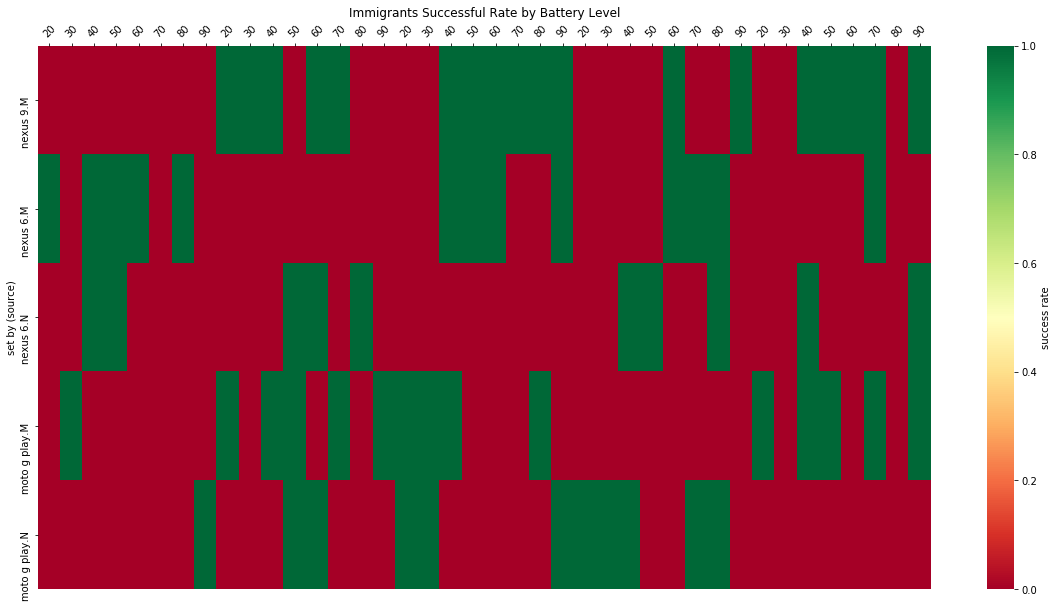

In [15]:
def find_immigrants(immig_dataframe_list, isWinners=True):
    results = {'nexus 9.M': 0, 'nexus 6.M': 0, 'nexus 6.N': 0, 'moto g play.M': 0, 'moto g play.N': 0}

    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        if isWinners: parents = immig.loc[immig['wasFitter']]['parent']
        else: parents = immig.loc[~immig['wasFitter']]['parent']
        for parent in parents:
            device_name = '.'.join(parent.split('.')[0:2])
            #print(device_name)
            if device_name in results:
                results[device_name]+=1
            else:
                results[device_name] = 1

    return results

def find_immigrants_by_battery_level(immig_dataframe_list, isWinners=True):
    results = {}
    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        # df.loc[df['column_name'] == some_value]

        if isWinners: 
            records = immig.loc[immig['wasFitter'] == True]
        else: records = immig.loc[~immig['wasFitter']]
        
        for ind, record in records.iterrows():
            #print(record)
            device_name = '.'.join(record.parent.split('.')[0:2])
            battery_level = record['battery level']
            
            if device_name in results:
                if battery_level in results[device_name]:
                    results[device_name][battery_level] +=1
                else:
                    results[device_name][battery_level] = 1
                
            else:
                results[device_name] = {battery_level:1}

    return results

def construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, isSuccessful, headers):
    count=0
    table = np.zeros([len(headers),len(headers)])
    for device_unique_immigrant_list in all_devices_unique_immigrants_dataframe_lists:
        successful_immigrants_all_experiments = find_immigrants(device_unique_immigrant_list, isSuccessful)
        if isSuccessful: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        else: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        #if type(successful_immigrants_all_experiments.values()) is dict:
            
        table[:,count] += list(successful_immigrants_all_experiments.values())
        count+=1
    return table

def construct_pretty_table_for_print(table, isSuccessful, headers, isBatteryLevel=False):
    myTable = PrettyTable()
    battery_level = []
    if isBatteryLevel:
        battery_level = [str((num%8)+2)+'0' for num in range(len(table[1,:]))]
        
    if isSuccessful: myTable.add_column('sent to (successful)',headers)
    else: myTable.add_column('sent to (unsuccessful)',headers)
        
    if isBatteryLevel: 
        for i in range(len(battery_level)):
            myTable.add_column(battery_level[i],table[:,i])
    else:
        for i in range(len(headers)):
            myTable.add_column(headers[i],table[:,i])
    print(myTable)
    #return myTable
    
    
def construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, isSuccessful, headers):
    '''Constructs the matrix that shows the number of immigrants that were sent from a device to another. NOTE: the headers contains the devices names and it must be sorted as all_devices_unique_immigrants_dataframe_lists'''
    count=0
    table = np.zeros([len(headers),len(headers)*8])
    for device_unique_immigrant_list in all_devices_unique_immigrants_dataframe_lists:
        successful_immigrants_all_experiments = find_immigrants_by_battery_level(device_unique_immigrant_list, isSuccessful)
        if isSuccessful: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        else: print(headers[count]+" received unsuccessful: ", successful_immigrants_all_experiments)
        
        for dict_key, dict_value in successful_immigrants_all_experiments.items():
            #print(dict_key, dict_value)
            
            for key in dict_value:
                col_index = int(str(int(round(key,-1)))[:1])-2 # (sent to index) since battery levels start from 20 -> round(20) = 20[:1] = 2 - 2 = 0
                row_index = headers.index(dict_key) # sent form index
                
                col_index =col_index+(count*8)
#                 print(key,"->",col_index+(headers.index(dict_key)*8))
#                 print(row_index, dict_key)
                
                table[row_index,col_index] += dict_value[key]
                #print(row_index, col_index, table[row_index,col_index])
        count+=1
            
        #
        
    return table
    
headers = ['nexus 9.M', 'nexus 6.M', 'nexus 6.N', 'moto g play.M', 'moto g play.N']

all_devices_unique_immigrants_dataframe_lists = [N9A6_immigrants_unique_dataframe_list, N6A6_immigrants_unique_dataframe_list,
                                                N6A7_immigrants_unique_dataframe_list, MGA6_immigrants_unique_dataframe_list,
                                                MGA7_immigrants_unique_dataframe_list]



succ_table = construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, True, headers)
construct_pretty_table_for_print(succ_table, True, headers)
unsucc_table = construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, False, headers)
construct_pretty_table_for_print(unsucc_table, False, headers)

total_sent = np.add(succ_table, unsucc_table)
print(total_sent)
success_rate = np.divide(succ_table, total_sent, out=np.zeros_like(succ_table), where=total_sent!=0)
print(success_rate)
construct_pretty_table_for_print(success_rate, True, headers)

plt.figure(figsize=(20, 10))
ax = sns.heatmap(success_rate, cmap="RdYlGn", xticklabels=headers, yticklabels=headers , vmin=0, vmax=1, 
                             cbar_kws={'label': 'success rate'})
ax.set_title("Overall Immigrants Successful Rate")
ax.set_ylabel("set by (source)")
#ax.set_xlabel("received in (destination)")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

#all_devices_unique_immigrants_dataframe_lists = [N6A6_immigrants_unique_dataframe_list]
# successful_immigrants_all_experiments_by_battery_level = find_immigrants_by_battery_level(MGA7_immigrants_unique_dataframe_list)
# unsuccessful_immigrants_all_experiments_by_battery_level = find_immigrants_by_battery_level(MGA7_immigrants_unique_dataframe_list, False)
# print("Nexus9A6 recieved successful by battery level: ", successful_immigrants_all_experiments_by_battery_level)
# print("Nexus9A6 recieved unsuccessful by battery level: ", unsuccessful_immigrants_all_experiments_by_battery_level)

succ_table_bl = construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, True, headers)
unsucc_table_bl = construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, False, headers)
total_sent_bl = np.add(succ_table_bl, unsucc_table_bl)
success_rate_bl = np.divide(succ_table_bl, total_sent_bl, out=np.zeros_like(succ_table_bl), where=total_sent_bl!=0)


construct_pretty_table_for_print(success_rate_bl, True, headers, True) #very big (zoom out the see it completely)
#print(ta)
battery_level = [str((num%8)+2)+'0' for num in range(len(success_rate_bl[1,:]))]
plt.figure(figsize=(20, 10))
ax = sns.heatmap(succ_table_bl, cmap="RdYlGn", xticklabels=battery_level, yticklabels=headers, vmin=0, vmax=1, 
                             cbar_kws={'label': 'success rate'})

ax.set_title("Immigrants Successful Rate by Battery Level")
ax.set_ylabel("set by (source)")
#ax.set_xlabel("received in (destination)")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

#save_to_excel(success_rate_bl, 'matrtix_by_battery_levels', 'datasets/')
        


In [12]:
succ_table_bl
unsucc_table_bl
print(total_sent_bl)
success_rate_bl
success_rate_text_lable = np.empty_like(success_rate_bl,str)
for i in total_sent_bl:
    print(i)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  6.  6.  8.  1.  3.  3.  0.  0.  1.  2.
   4.  3.  3.  3.  6.  8.  0.  1.  0.  0.  5.  0.  2.  5.  0.  0.  1.  5.
   3.  6.  2.  3.]
 [ 7.  1.  7.  6. 10.  5.  8.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   3.  7.  6.  2.  3.  1.  0.  0.  0.  0.  1.  6.  1.  1.  0.  1.  0.  1.
   1.  1.  2.  1.]
 [ 1.  1.  3.  2.  0.  4.  1.  0.  1.  3.  0.  3.  6.  0. 10.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  2.  8.  8.  2.  0.  3.  0.  2.  6.  5.  3.
   3.  0.  2.  1.]
 [ 1.  5.  0.  0.  0.  1.  0.  0.  2.  0.  1.  1.  0.  3.  0.  2.  3.  4.
   3.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  2.  3.  1.
   2.  3.  3.  4.]
 [ 0.  3.  0.  1.  0.  0.  1.  1.  0.  1.  1.  3.  1.  4.  0.  0.  5.  4.
   0.  0.  0.  2.  0.  1.  9.  7.  2.  2.  2.  4.  4.  4.  0.  0.  0.  0.
   0.  0.  0.  0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 6. 6. 8. 1. 3. 3. 0. 0. 1. 2. 4. 3. 3. 3. 6. 8.
 0. 1. 0. 0. 5. 0. 2. 5. 0. 0. 1. 5. 3. 6. 2. 3.]
[ 7.  1.  7.  6. 10.  5.  8.  9.  0.  0. 